# Homework 1: Greenhouse Gases and Climate change

#### Deadline: Monday 14 October 2024 (by 5pm)

#### Credits: 20 points

## Name: Rolando Sánchez

- When you finish, please send me the **.ipynb** file via email to wbanda@yachaytech.edu.ec



- This homework is individual. Please include your name in the notebook.



- Within a **single python notebook**, solve the following problems:

## Problem 1. (9 points) Data I/O and regression: $\rm CO_2$ emission

This problem consists of reading, displaying, analysing, and modelling $\rm CO_2$ concentration data from a monitoring station located in Kennaook/Cape Grim, Australia.

The data files for this and the next exercises were downloaded from the CSIRO site:

https://www.csiro.au/en/research/natural-environment/atmosphere/Latest-greenhouse-gas-data

For this problem, you will use the following CSV file:

https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/CapeGrim_CO2_data_download.csv


### Tasks:

(a) Inspect the structure of the file. Then, create a python function that uses **pandas** to read in the **CapeGrim_CO2_data_download.csv** file, skips the header, place the data into a pandas dataframe, and returns 3 columns as arrays, namely: "DATE", "CO2(ppm)", "SD(ppm)". The first one has the data collection times, the second one contains $\rm CO_2$ concentrations in $\rm ppm$, and the third one has the respective instrumental standard deviations also in $\rm ppm$.

(b) Now, you will rescale the uncertainties to more realistic values by multiplying the instrumental standard deviation by $10$, so $\sigma=10\,\sigma_{\rm instrumental}$. The instrumental uncertainties are very small, and there are unaccounted-for errors, such as systematic errors. A factor of $\sim 10$ is a fine estimate for this data set.

(c) Make a high-quality, labeled plot of the $\rm CO_2$ concentrations (in $\rm ppm$) versus time, including the y-error bars equal to the uncertainties calculated in (b).

(d) How monotonic and linear is the relation between the two variables?

(e) Now, you will carry out a regression on the data, assuming a simple linear regression model (**"Model 1"**) with 2 free parameters. Carry out a $\chi^2$ minimisation, and report the resulting equation and figure. The figure should have a high-quality, labeled plot of the original data with error bars and the resulting best-fit line.

(f) To perform a goodness-of-fit test, create a python function that calculates the global $\chi^2$ statistic, the number of degrees of freedom, and the reduced $\chi^2$ statistic. Briefly comment on your findings, is the linear model a good model?

(g) Next, you can propose your own model (**"Model 2"**) for the data. Motivate and write down your model. Then, repeat steps (e) and (f) for your model and compare the reduced $\chi^2$ statistic with that of the linear model. Which model is better? Hint: Keep the model simple with maximum 2 free parameters and avoid overfitting.

(h) Finally, you will construct **2D confidence intervals** using the $\chi^2$ statistic evaluated in the vicinity of the best-fit values for the free parameters of Models 1 and 2. Since both models have two free parameters, you should create python functions that compute and return the 2D $\chi^2$ surface of each model onto the respective parameter space. Hints: to create a 2D parameter space as a meshgrid, you should first create vectors with numbers around the best-fit values found in your regressions. 1D plots showing $\chi^2$ as a function of each parameter may help identify optimal numbers.

(i) Make a high-quality, labeled, multi-panel figure showing the 2D $\chi^2$ surface of each model: first in 3D, and then in projection with a marker showing the minimum and overimposed contours indicating at least two confidence levels. Briefly comment on your results highlighting the differences between the confidence intervals of both models. What do these confidence intervals tell us? Hint: the maps should have one of the free parameters in the X axis, the other free parameter in the Y axis, and the $\chi^2$ surface in the Z axis.

### Solution

In [6]:
#Importing necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd #To read and organize files
import scipy.constants as cte #To get physical constants
import scipy.optimize as opt #To get the right parameters
import scipy.stats as st #To get statistic coefficients (Pearson, Spearman, etc) 
import scipy.interpolate as interp #To interpolate data

(a) Inspect the structure of the file. Then, create a python function that uses **pandas** to read in the **CapeGrim_CO2_data_download.csv** file, skips the header, place the data into a pandas dataframe, and returns 3 columns as arrays, namely: "DATE", "CO2(ppm)", "SD(ppm)". The first one has the data collection times, the second one contains $\rm CO_2$ concentrations in $\rm ppm$, and the third one has the respective instrumental standard deviations also in $\rm ppm$.

In [8]:
PATH = "1D-data/"
filename = "CapeGrim_CO2_data_download.csv"

In [9]:
# Inspecting the data with vim, we can see that there are 24 rows as headers.
#df = pd.read_csv(PATH+filename, skiprows=24)
#df


In [10]:
# Defining the input-output function
def io_data(filename):
    """
    This is an I/O function that opens a file with data
    and return data arrays.
    Input: filename (str)
    Outputs: date (np.array, float) -> time data in years
            co2 (np.array, float) -> CO2 emission in ppm
            sd (np.array, float) -> instrumental standard deviations in CO2 emissions.

    Author: R.S.S.G.
    Date created: 03/10/2024
    """

    df = pd.read_csv(filename, skiprows=24)
    date = np.array(df["DATE"])
    co2 = np.array(df["CO2(ppm)"])
    sd = np.array(df["SD(ppm)"])
    return date,co2,sd

(b) Now, you will rescale the uncertainties to more realistic values by multiplying the instrumental standard deviation by $10$, so $\sigma=10\,\sigma_{\rm instrumental}$. The instrumental uncertainties are very small, and there are unaccounted-for errors, such as systematic errors. A factor of $\sim 10$ is a fine estimate for this data set.

In [12]:
# Calling our IO function
date, co2, sd_ins = io_data(PATH+filename)

In [13]:
# Defining our new more realistic standard deviation
sd = 10*sd_ins

(c) Make a high-quality, labeled plot of the $\rm CO_2$ concentrations (in $\rm ppm$) versus time, including the y-error bars equal to the uncertainties calculated in (b).

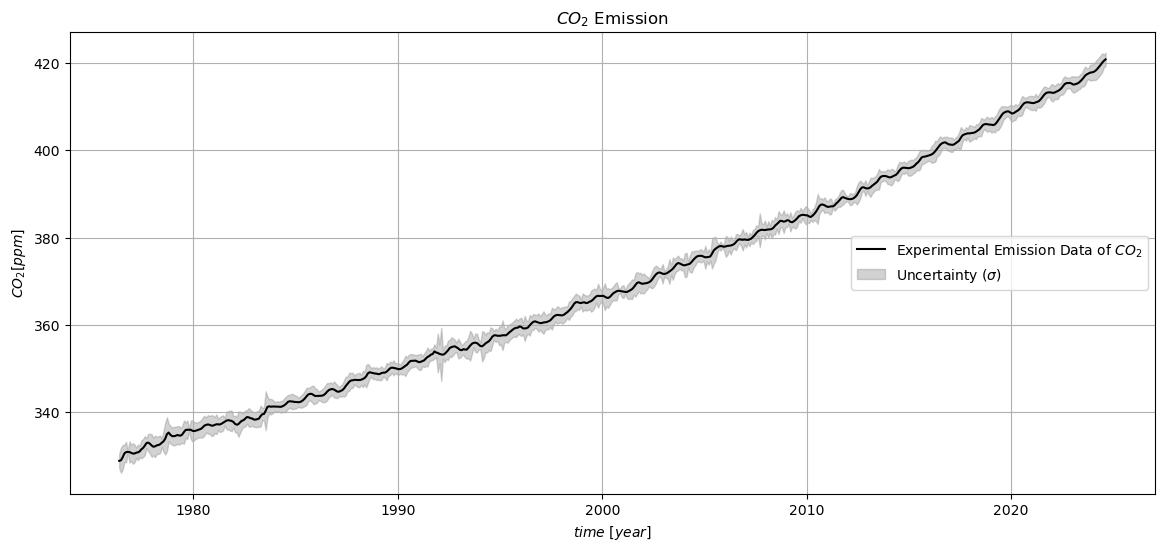

In [309]:
plt.figure(figsize=(14,6))

plt.plot(date, co2, color = "k", label = "Experimental Emission Data of $CO_2$")
#plt.errorbar(date, co2, yerr= sd, alpha = 0.3, marker = " ", linestyle = " ")

# Only for style, I've used this shaded region to represent standard deviation instead of the above plt.errorbar()
plt.fill_between(date, co2 - sd, co2 + sd, color='gray', alpha=0.35, label="Uncertainty ($\\sigma$)")


plt.title("$CO_2$ Emission")
plt.xlabel("$time\\ [year]$")
plt.ylabel("$CO_2 [ppm]$")
plt.legend(loc=5)

plt.grid()

plt.show()
plt.close()

Let's make a **zoom** to have a better view of the error bars.

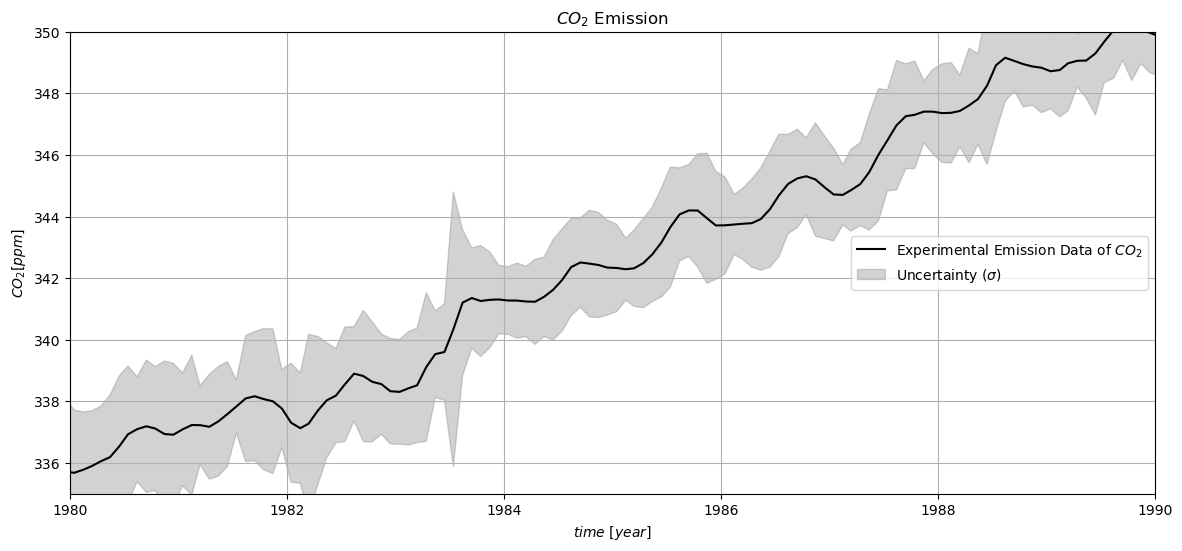

In [255]:
plt.figure(figsize=(14,6))

plt.plot(date, co2, color = "k", label = "Experimental Emission Data of $CO_2$")

plt.fill_between(date, co2 - sd, co2 + sd, color='gray', alpha=0.35, label="Uncertainty ($\\sigma$)")


plt.title("$CO_2$ Emission")
plt.xlabel("$time\\ [year]$")
plt.ylabel("$CO_2[ppm]$")
plt.legend(loc=5)

plt.grid()

plt.xlim(1980,1990)
plt.ylim(335,350)

plt.show()
plt.close()

d) How monotonic and linear is the relation between the two variables?

For monotonicity and linearity, we use the Spearman coefficient and Pearson coefficient respectively.

In [20]:
# Getting the coefficients
sp = st.spearmanr(date,co2)
pe = st.pearsonr(date, co2)

In [21]:
# Reporting these coefficients
print("Spearman Coefficient: %.5f" %sp[0])
print("Pearson Coefficient: %.5f" % pe[0])

Spearman Coefficient: 0.99980
Pearson Coefficient: 0.99525


From this, we could say that the relation between time/date and $CO_2$ emission is **increasing monotonic and linear.**

(e) Now, you will carry out a regression on the data, assuming a simple linear regression model (**"Model 1"**) with 2 free parameters. Carry out a $\chi^2$ minimisation, and report the resulting equation and figure. The figure should have a high-quality, labeled plot of the original data with error bars and the resulting best-fit line.

In [267]:
# Our model
def model1(t,a,b):
    """
    This is a first linear model for CO2 emission as a function of time.
    Input: t (float) -> time data in years 
        parameters (tuple, float) -> free parameters a and b
    Output: y (float) -> value of the modelated CO2 emission.
    Author: R.S.S.G.
    Date created: 03/10/2024
    """
    y = a*t + b
    return y

In [277]:
# Defining the chi^2 stat for the 1st model
def chi_sqr_stat_m1(parameters):
    """
    This is a function that return the chi^2 stat.
    Input: parameters (tuple, float) -> free parameters
    Output: chi_sqr (float) -> value of chi^2 stat
    Author: R.S.S.G.
    Date created: 03/10/2024
    """
    a, b = parameters
    t = date
    # Physically motivated model
    phys_model = a*t + b
    
    # Use the chi^2 formula
    chi_sqr = np.sum((co2 - phys_model)**2/(sd)**2)
    return chi_sqr

In [289]:
# Take the ansatsz (educated guess)
initial_guess = np.array((1,-300))

# Call the minimization routine, where I've used method Powell as the minimization wouldn't terminate succesfully without it. 
res_co2 = opt.minimize(chi_sqr_stat_m1, initial_guess, method = "Powell")

# Print the result:
print("The parameters are:\n",res_co2.x)

The parameters are:
 [ 1.75335935e+00 -3.13755225e+03]


In [291]:
# Check if the optimization was succesful
res_co2.success

True

In [293]:
a, b= (res_co2.x[0], res_co2.x[1])

In [295]:
# Print the equation
print("And the equation of the line is give by:\n y = %.4f *t - %.4f" %(a,abs(b)))

And the equation of the line is give by:
 y = 1.7534 *t - 3137.5522


In [297]:
# In this case I will "sacrify resolution" and use the same experimental time data to evaluate the model
# as we'll need this co2 fitted data to have the same length as the experimental one for future tasks!  
new_co2 = model1(date, a, b)

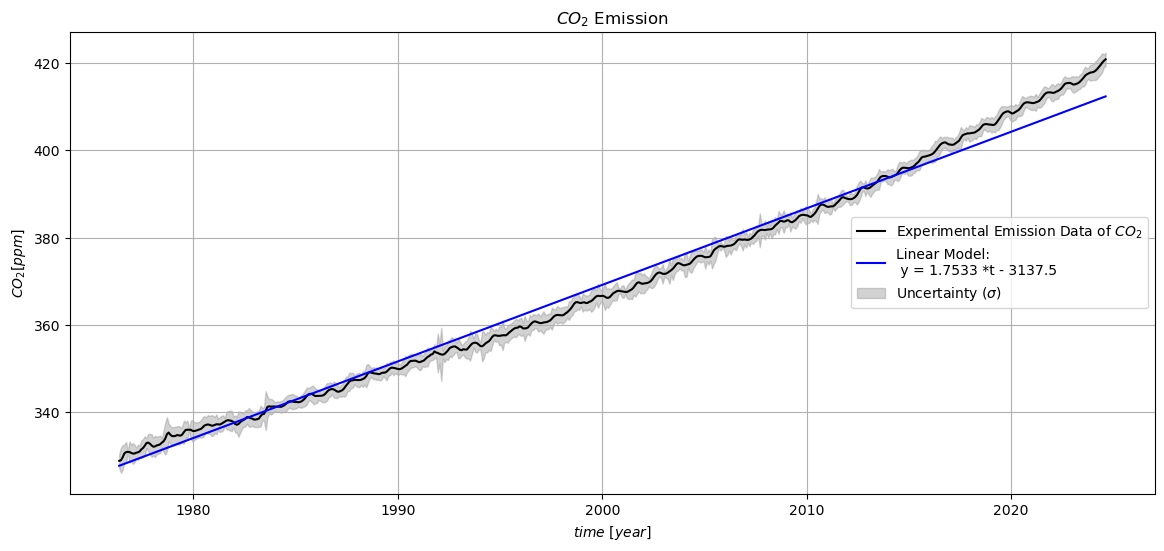

In [299]:
plt.figure(figsize=(14,6))

plt.plot(date, co2, color = "k", label = "Experimental Emission Data of $CO_2$")
plt.plot(date, new_co2, color = "b", label = "Linear Model:\n y = %.6s *t - %.6s" %(a,abs(b)))

plt.fill_between(date, co2 - sd, co2 + sd, color='gray', alpha=0.35, label="Uncertainty ($\\sigma$)")


plt.title("$CO_2$ Emission")
plt.xlabel("$time\\ [year]$")
plt.ylabel("$CO_2[ppm]$")
plt.legend(loc=5)

plt.grid()

plt.show()
plt.close()

Zooming in...

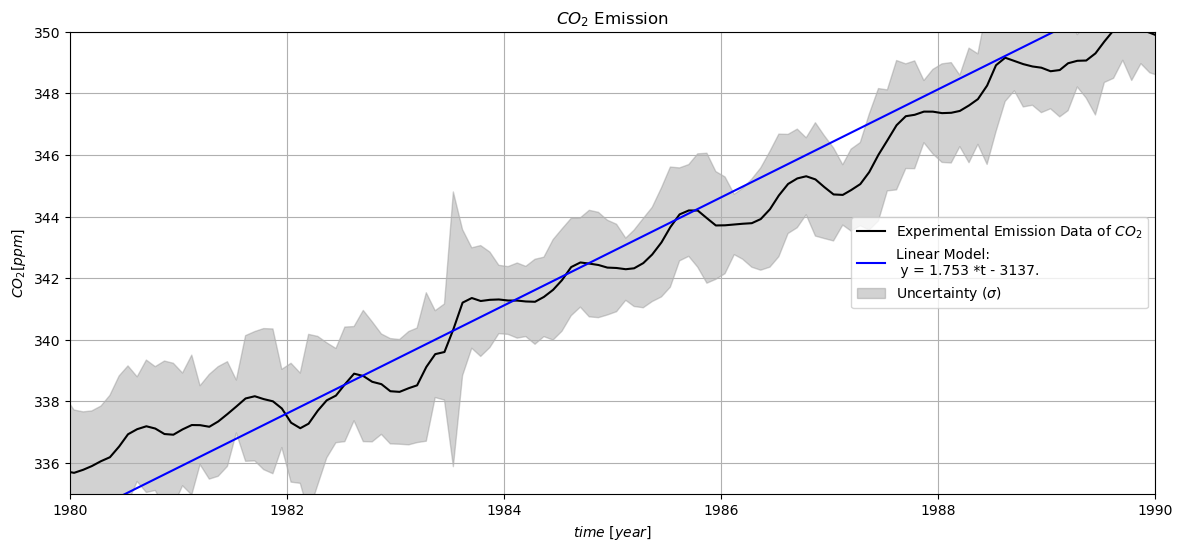

In [33]:
plt.figure(figsize=(14,6))

plt.plot(date, co2, color = "k", label = "Experimental Emission Data of $CO_2$")
plt.plot(date, new_co2, color = "b", label = f"Linear Model:\n y = %.5s *t - %.5s" %(a,abs(b)))

plt.fill_between(date, co2 - sd, co2 + sd, color='gray', alpha=0.35, label="Uncertainty ($\\sigma$)")


plt.title("$CO_2$ Emission")
plt.xlabel("$time\\ [year]$")
plt.ylabel("$CO_2[ppm]$")
plt.legend(loc=5)

plt.grid()
plt.xlim(1980,1990)
plt.ylim(335,350)
plt.show()
plt.close()

**Using opt.curve_fit()**, we should obtain almost the exact same results. <br> We'll see the difference is super tiny as expected. 

In [313]:
# Calling opt.curve_fit()
coef_chi, cova_chi = opt.curve_fit(model1, date, co2, sigma = sd)

#Uncertainties
sigma_coef = np.sqrt(np.diag(cova_chi))
# Reporting coefficients and uncertainties
print("Best-fit parameters", coef_chi)
print("Associate uncertainties:", sigma_coef)

Best-fit parameters [ 1.75335935e+00 -3.13755224e+03]
Associate uncertainties: [7.18134752e-03 1.43522013e+01]


In [315]:
# Defining a new co2 fitted vector with the same shape of the original date as we're going to use it later at calculating the chi^2 stat!
fit_co2 = model1(date, *coef_chi)

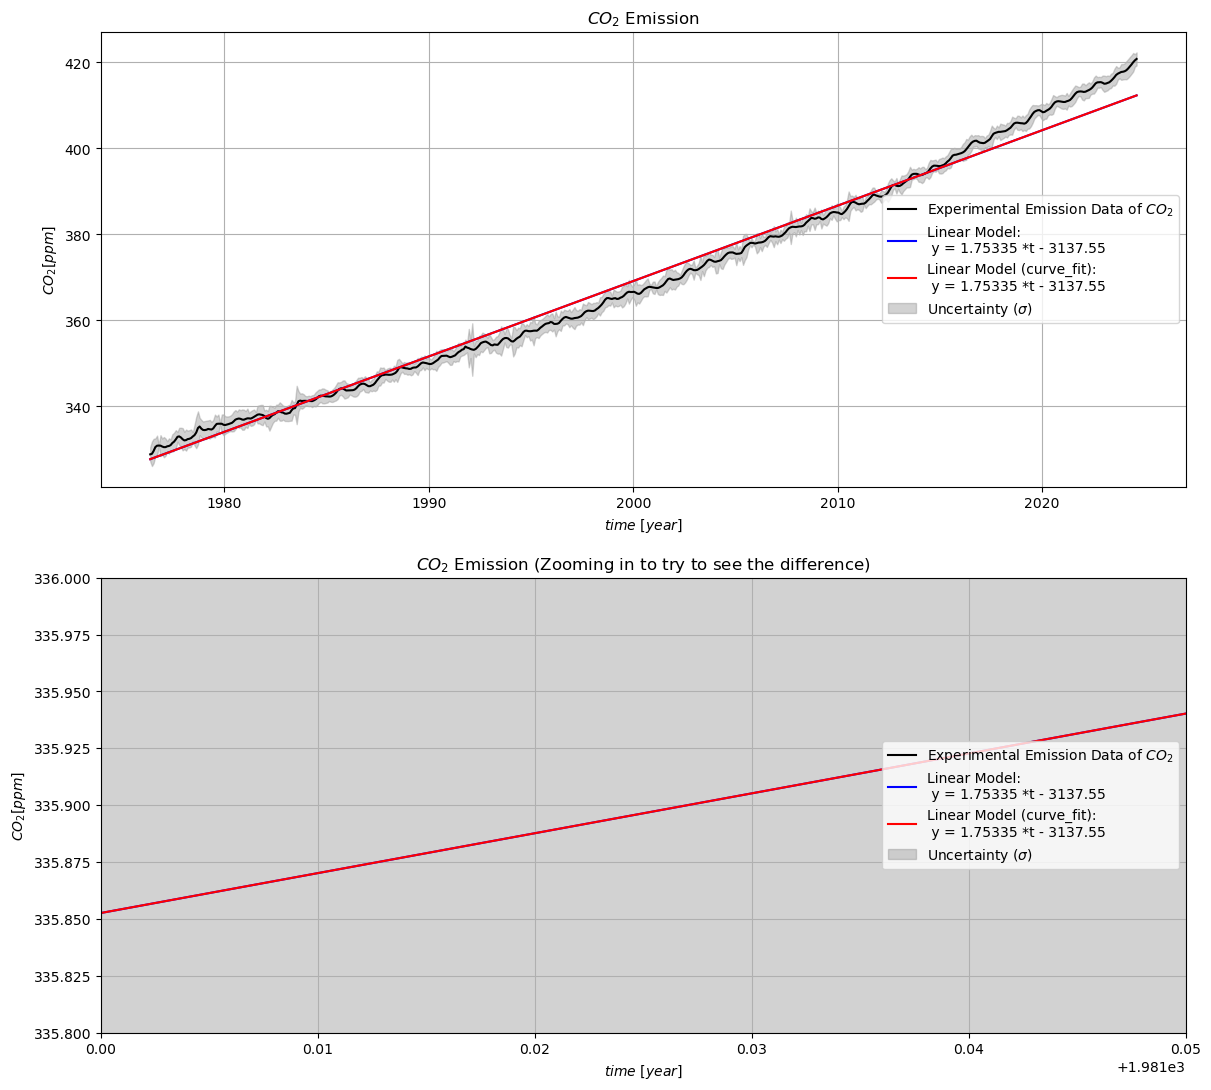

In [317]:
plt.figure(figsize=(14,13))

plt.subplot(2,1,1)
plt.plot(date, co2, color = "k", label = "Experimental Emission Data of $CO_2$")
plt.plot(date, new_co2, color = "b", label = f"Linear Model:\n y = %.7s *t - %.7s" %(a,abs(b)))
plt.plot(date, fit_co2, color = "r", label = f"Linear Model (curve_fit):\n y = %.7s *t - %.7s" %(coef_chi[0],abs(coef_chi[1])))

plt.fill_between(date, co2 - sd, co2 + sd, color='gray', alpha=0.35, label="Uncertainty ($\\sigma$)")


plt.title("$CO_2$ Emission")
plt.xlabel("$time\\ [year]$")
plt.ylabel("$CO_2[ppm]$")
plt.legend(loc=5)
plt.grid()

# Zooming in
plt.subplot(2,1,2)
plt.plot(date, co2, color = "k", label = "Experimental Emission Data of $CO_2$")
plt.plot(date, new_co2, color = "b", label = f"Linear Model:\n y = %.7s *t - %.7s" %(a,abs(b)))
plt.plot(date, fit_co2, color = "r", label = f"Linear Model (curve_fit):\n y = %.7s *t - %.7s" %(coef_chi[0],abs(coef_chi[1])))

plt.fill_between(date, co2 - sd, co2 + sd, color='gray', alpha=0.35, label="Uncertainty ($\\sigma$)")


plt.title("$CO_2$ Emission (Zooming in to try to see the difference)")
plt.xlabel("$time\\ [year]$")
plt.ylabel("$CO_2[ppm]$")
plt.legend(loc=5)

plt.xlim(1981,1981.05)
plt.ylim(335.8,336)
plt.grid()

plt.show()
plt.close()

Therefore, we've checked that both methods are equivalent, as they should!

(f) To perform a goodness-of-fit test, create a python function that calculates the global $\chi^2$ statistic, the number of degrees of freedom, and the reduced $\chi^2$ statistic. Briefly comment on your findings, is the linear model a good model?

In [319]:
def chi_sqr_red_stat(fex, fit, sigma):
    """
    This is a function that return the reduced chi^2 stat.
    Input: fex, fit (both are np.array that contains floats) -> experimental and fitted co2 data.
            sigma (np.array, float) -> standard deviation of experimental co2 data 
    Output: chi_sqr_red (float) -> reduced chi^2 value
    Author: R.S.S.G.
    Date created: 04/10/2024
    """

    # Use the chi^2 formula
    chi_sqr = np.sum((fex - fit)**2/(sigma)**2)
    
    # We had 2 free parameters (a,b) and then
    # nu = N - #param
    nu = len(fex) - 2

    chi_sqr_red = chi_sqr/nu

    return chi_sqr_red

Using the values for the parameters (a,b) obtained by minimizing the $\chi^2$ stat, we get

In [321]:
# Compute the reduced chi^2 stat using the fit_co2 vector we create previously
chi_red_1 = chi_sqr_red_stat(co2, new_co2, sd)

# Print reduced chi^2 value
print("The reduced chi squared is: ", chi_red_1)

The reduced chi squared is:  4.081860366414844


And using the coefficients from the regression with opt.curve_fit()

In [44]:
# Just to see if there's a difference with the values obtained with curve_fit and the manual minimization.
print("The reduced chi squared (using opt.curve_fit()) is: ", chi_sqr_red_stat(co2, fit_co2, sd))

# Let's get the difference between them
print("Difference between reduced chi square stats: ", chi_red_1 - chi_sqr_red_stat(co2, fit_co2, sd), "\nWe can see that it's super tiny, and we can consider both as the same")


The reduced chi squared (using opt.curve_fit()) is:  4.081860366414913
Difference between reduced chi square stats:  -6.927791673660977e-14 
We can see that it's super tiny, and we can consider both as the same


**Now**, as the reduced $\chi_{\nu}^2$ is small and close to one, **we could say that this linear model is relatively good**. <br> Here we had to remember that a $\chi_{\nu}^2$ > 1 indicates that the fit has not fully captured the data or that the error variance has been underestimated. <br> On the other hand, $\chi_{\nu}^2$ < 1 indicates an overfitting of the data!

(g) Next, you can propose your own model (**"Model 2"**) for the data. Motivate and write down your model. Then, repeat steps (e) and (f) for your model and compare the reduced $\chi^2$ statistic with that of the linear model. Which model is better? Hint: Keep the model simple with maximum 2 free parameters and avoid overfitting.


As it seems that the slope grows a little almost at the end, then we can try a quartic polynomial of t such that: 
$$y = a\, t^{4} + b$$
Where $a$ would be a small value as the shape of the model should be wide and $b$ help us to shift it where it should "start". 

In [327]:
def model2(t, a, b):
    """
    This is a quartic polynomial of t model for CO2 emission as a function of time.
    Input: t (float) -> time data in years 
        parameters (tuple, float) -> free parameters a and b
    Output: y (float) -> value of the modelated CO2 emission.
    Author: R.S.S.G.
    Date created: 04/10/2024
    """
    y = (a*(t**4)) + b
    return y 

Here, we're going to use curve_fit()

In [335]:
coef_chi2, cova_chi2 = opt.curve_fit(model2, date, co2, sigma = sd, p0 = [1,-400])

#Uncertainties
sigma_coef2 = np.sqrt(np.diag(cova_chi2))

# Reporting
print("Best-fit parameters:", coef_chi2)

print("Associate uncertainties:", sigma_coef2)

Best-fit parameters: [ 5.50179603e-11 -5.11400037e+02]
Associate uncertainties: [2.04973871e-13 3.27214341e+00]


In [339]:
# Again, using our coefficients and the second model, we define a vector with the fitted values (same length of date as we're going to need that later)
new_co2_2 = model2(date, *coef_chi2)

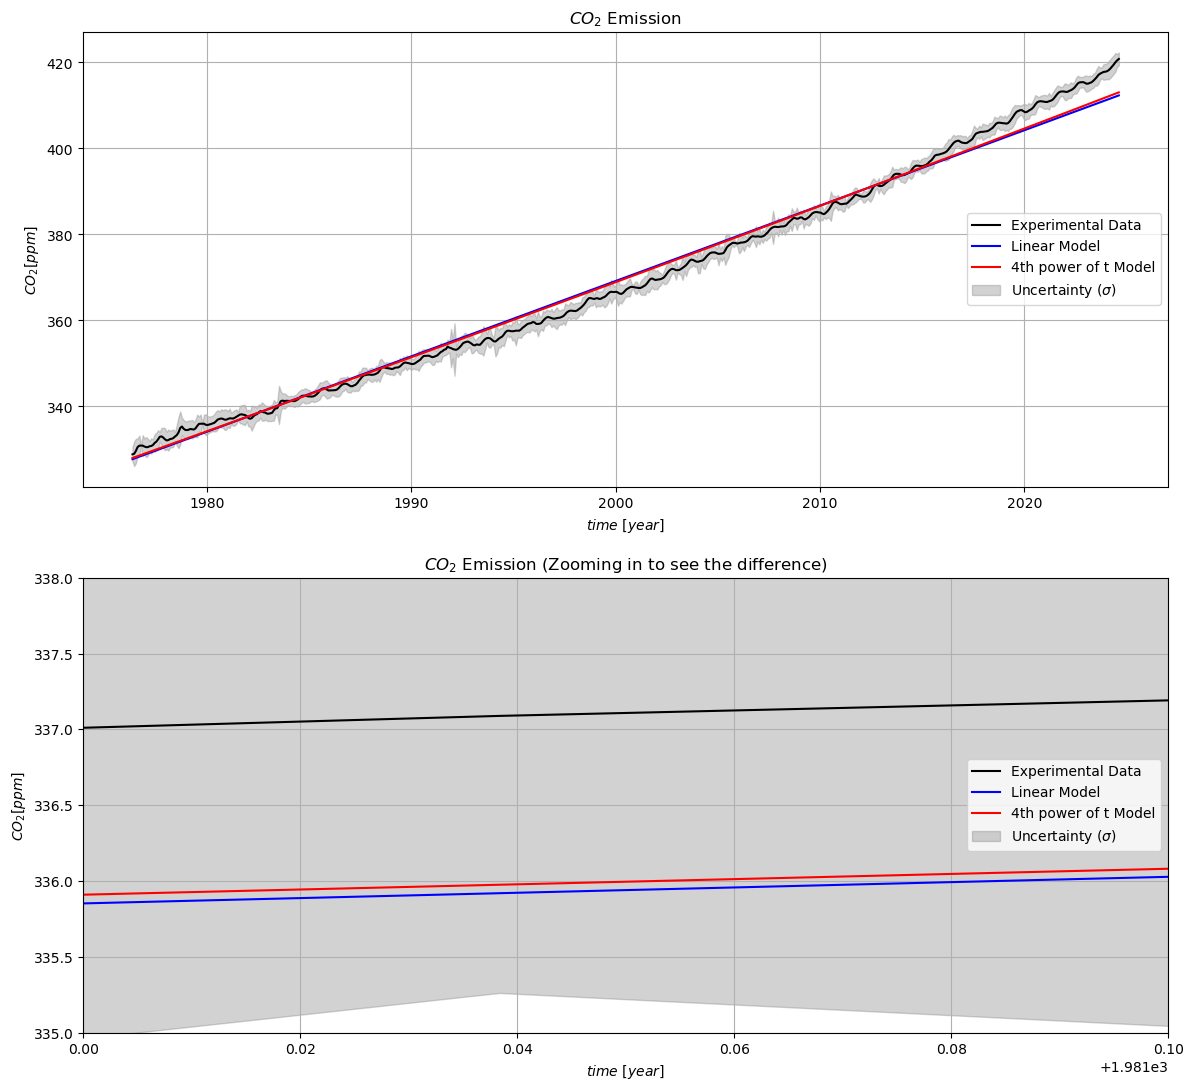

In [52]:
plt.figure(figsize=(14,13))

plt.subplot(2,1,1)
plt.plot(date, co2, color = "k", label = "Experimental Data")
plt.plot(date, new_co2, color = "b", label = "Linear Model")
plt.plot(date, new_co2_2, color = "r", label = "4th power of t Model")

plt.fill_between(date, co2 - sd, co2 + sd, color='gray', alpha=0.35, label="Uncertainty ($\\sigma$)")


plt.title("$CO_2$ Emission")
plt.xlabel("$time\\ [year]$")
plt.ylabel("$CO_2[ppm]$")
plt.legend(loc=5)

plt.grid()
# Zooming in
plt.subplot(2,1,2)
plt.plot(date, co2, color = "k", label = "Experimental Data")
plt.plot(date, new_co2, color = "b", label = "Linear Model")
plt.plot(date, new_co2_2, color = "r", label = "4th power of t Model")

plt.fill_between(date, co2 - sd, co2 + sd, color='gray', alpha=0.35, label="Uncertainty ($\\sigma$)")


plt.title("$CO_2$ Emission (Zooming in to see the difference)")
plt.xlabel("$time\\ [year]$")
plt.ylabel("$CO_2[ppm]$")
plt.legend(loc=5)

plt.xlim(1981,1981.1)
plt.ylim(335,338)
plt.grid()

plt.show()
plt.close()

In [343]:
# Let's get its reduced chi squared statistic 
# Compute the reduced chi^2 stat
chi_red_2 = chi_sqr_red_stat(co2, new_co2_2, sd)

# Print reduced chi^2 value
print("The reduced chi squared is: ", chi_red_2)

The reduced chi squared is:  3.3829573044358594


Now, we'll try to use optimization of $\chi^2$ to see if we get the same results.  

In [394]:
def chi_sqr_stat_m2(parameters):
    """
    This is a function that return the chi^2 stat for our quartic model.
    Input: parameters (tuple, float) -> free parameters
    Output: chi_sqr (float) -> value of chi^2 stat
    Author: R.S.S.G.
    Date created: 04/10/2024
    """
    a, b = parameters
    t = date
    # Physically motivated model
    phys_model = a*(t**4)+b
    
    # Use the chi^2 formula
    chi_sqr = np.sum((co2 - phys_model)**2/(sd)**2)
    return chi_sqr

In [360]:
# Take the initial guess -> ansatsz (educated guess)
initial_guess = np.array([1,-400])

# Call the minimisation routine.
# I've used method = "Nelder-Mead" as without it, the optimization wouldn't terminate succesfully
res_co2_2 = opt.minimize(chi_sqr_stat_m2, initial_guess, method = "Nelder-Mead")

# Print the result:
print("The parameters are:\n",res_co2_2.x)

The parameters are:
 [ 5.50179604e-11 -5.11400037e+02]


In [362]:
# Check if the optimization was succesful
res_co2_2.message

'Optimization terminated successfully.'

In [364]:
#  We need the same length for experimental and fitted data
fit_co2_2 = model2(date, res_co2_2.x[0], res_co2_2.x[1])

# Compute the reduced chi^2 stat
chi_red_22 = chi_sqr_red_stat(co2, fit_co2_2, sd)

# Print reduced chi^2 value
print("The reduced chi squared is: ", chi_red_22)

The reduced chi squared is:  3.38295730443838


In [366]:
# Let's get the difference between in this model
print("Difference between reduced chi square stats: ", abs(chi_red_2 - chi_red_22), "\nWe can see that it's super tiny, and we can consider both as the same, again as expected.")


Difference between reduced chi square stats:  2.5206503551089554e-12 
We can see that it's super tiny, and we can consider both as the same, again as expected.


Now, even though $\chi^2_{\nu}$ was **smaller** for the second model (Quartic polynomial of t), **the difference is small to consider it as a huge realistic improvement.**

(h) Finally, you will construct **2D confidence intervals** using the $\chi^2$ statistic evaluated in the vicinity of the best-fit values for the free parameters of Models 1 and 2. Since both models have two free parameters, you should create python functions that compute and return the 2D $\chi^2$ surface of each model onto the respective parameter space. Hints: to create a 2D parameter space as a meshgrid, you should first create vectors with numbers around the best-fit values found in your regressions. 1D plots showing $\chi^2$ as a function of each parameter may help identify optimal numbers.

In [444]:
# First, let's define our parameters for the first and second model
a_1, b_1 = coef_chi[0],coef_chi[1]
a_2, b_2 = coef_chi2[0], coef_chi2[1]

# Then, define its uncertainties from the covariance matrix to use them as bounds.
sa_1, sb_1 = tuple(sigma_coef)
sa_2, sb_2 = tuple(sigma_coef2)

In [428]:
def chi_sqrt_2D(parameters, uncertainties, date, chi_stat):
    """
    This is a function that returns the 2D chi^2 stat surface for the each model.
    As it uses as input the previously defined chi^2 stats for each model, it can compute the surfaces for both models 
    Input: parameters (tuple, float) -> optimal free parameters
        uncertainties (tuple, float) -> uncertainties of the optimal free parameters
        date (np.array, float) -> time data array, we just need it to get the length of it
        chi_stat (function) -> this is the prevously defined 1D chi^2 stat for each model
    Output: chi (2D np.array, float) -> 2D surface of chi^2 stat. 
    Author: R.S.S.G.
    Date created: 04/10/2024
    """
    # Get the parameters
    a_1, b_1 = parameters
    sa_1, sb_1 = uncertainties
    
    # So let's define the vectors with values around the free parameters
    a_mult1 = np.linspace(a_1 - 2*sa_1, a_1 + 2*sa_1, len(date))
    b_mult1 = np.linspace(b_1 - 2*sb_1, b_1 + 2*sb_1, len(date))

    # Now, we create a meshgrid
    A1_2D, B1_2D = np.meshgrid(a_mult1, b_mult1)
    
    # Empty matrix ready to receive the values for the surface
    chi = np.zeros_like(A1_2D)
    
    # Now, we iterate through the matrix elements of chi
    # Each element will have the chi^2 value for specific a and b
    for i in range(chi.shape[0]):
        for j in range(chi.shape[1]):
            chi[i,j] = chi_stat((A1_2D[i,j],B1_2D[i,j]))

    return chi

In [430]:
test_chi1 = chi_sqrt_2D((a_1,b_1),(sa_1,sb_1),date, chi_sqr_stat_m1)

In [432]:
test_chi2 = chi_sqrt_2D((a_2,b_2),(sa_2,sb_2),date, chi_sqr_stat_m2)

In [416]:
# Then, let's define the vectors with values around these parameters
a_mult1 = np.linspace(a_1 - 2*sigma_coef[0],a_1 + 2*sigma_coef[0], len(date))
b_mult1 = np.linspace(b_1 - 2*sigma_coef[1],b_1 + 2*sigma_coef[1], len(date))
a_mult2 = np.linspace(a_2 - 2*sigma_coef2[0],a_2 + 2*sigma_coef2[0], len(date))
b_mult2 = np.linspace(b_2 - 2*sigma_coef2[1],b_2 + 2*sigma_coef2[1], len(date))


# Now, we create a meshgrid
A1_2D, B1_2D = np.meshgrid(a_mult1, b_mult1)
A2_2D, B2_2D = np.meshgrid(a_mult2, b_mult2)

In [64]:
# This was part of a bunch of trials in order to get reasonable parameters for the previous part
# chi_v = []
# for i in range(len(a_mult1)):
#     chi_v.append(chi_sqr_stat_m1((a_1,b_mult1[i])))

# chi_v = np.array(chi_v)
# plt.plot(b_mult1,chi_v)
# plt.plot(b_1, chi_sqr_stat_m1((a_1,b_1)), color = "red", linestyle = " ",marker = "d")

As the values for $b_i$ and $\chi^2_i$ are huge, we'll rescale them in the plots by factors of $10^{-x}$. And we have used their respective prefixes. <br>
We didn't use logarithmic scale as it was giving us "problems" with the plots (The shapes of the plots were a little weird).

**For the first model**

In [67]:
# Empty matrix ready to receive the values for the surface
chi_m1 = np.zeros_like(A1_2D)

# Now, we iterate through the matrix elements of chi_m1
# Each element will have the chi^2 value for specific a and b
for i in range(chi_m1.shape[0]):
    for j in range(chi_m1.shape[1]):
        chi_m1[i,j] = chi_sqr_stat_m1((A1_2D[i,j],B1_2D[i,j]))

So, it'd be nice to see the 1D curve for each parameter and how these interect in the minimimum with coordinates ($a_i, b_i$)

In [69]:
a_c1 = np.ones(a_mult1.shape)*a_1
b_c1 = np.ones(b_mult1.shape)*b_1

curve_a1 = []
curve_b1 = []
for i in range(a_c1.shape[0]):
    curve_a1.append(chi_sqr_stat_m1((a_c1[i],b_mult1[i])))
    curve_b1.append(chi_sqr_stat_m1((a_mult1[i],b_c1[i])))
curve_a1 = np.array(curve_a1)
curve_b1 = np.array(curve_b1)

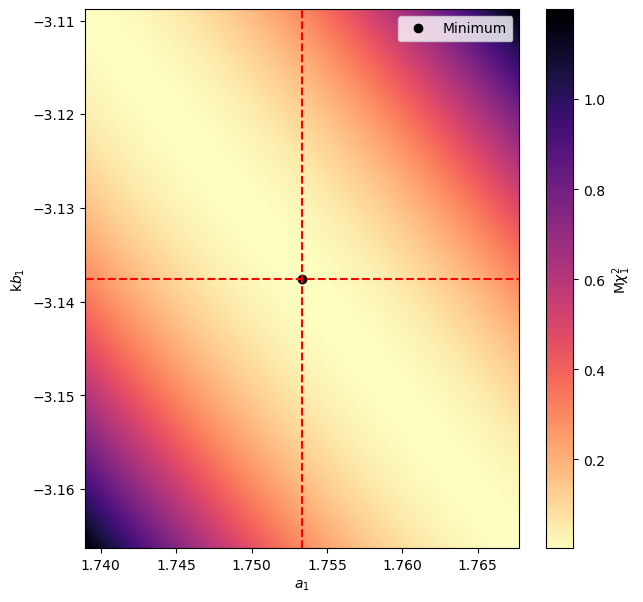

In [436]:
plt.figure(figsize=(7,7))

Z = plt.pcolor(A1_2D, B1_2D*(10**(-3)), (test_chi1)*(10**(-6)), cmap = "magma_r")

plt.plot(a_1,b_1*(10**(-3)),marker="o", color = "k", label = "Minimum", linestyle = " ")
plt.plot(a_c1, b_mult1*(10**(-3)), color = "r", linestyle = "--")
plt.plot(a_mult1, b_c1*(10**(-3)), color = "r", linestyle = "--")

# Add a colour bar
plt.colorbar(Z, label = "M$\\chi^2_1$")

# Axes labels
plt.xlabel("$a_1$")
plt.ylabel("k$b_1$")

plt.legend()

plt.show()

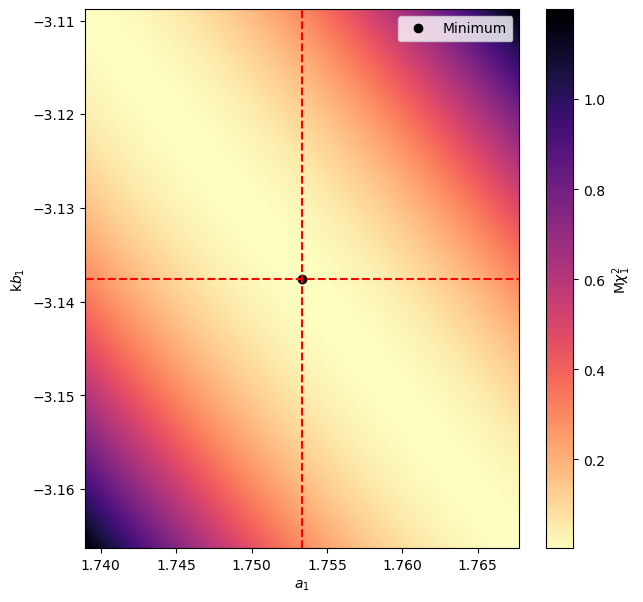

In [70]:
plt.figure(figsize=(7,7))

Z = plt.pcolor(A1_2D, B1_2D*(10**(-3)), (chi_m1)*(10**(-6)), cmap = "magma_r")

plt.plot(a_1,b_1*(10**(-3)),marker="o", color = "k", label = "Minimum", linestyle = " ")
plt.plot(a_c1, b_mult1*(10**(-3)), color = "r", linestyle = "--")
plt.plot(a_mult1, b_c1*(10**(-3)), color = "r", linestyle = "--")

# Add a colour bar
plt.colorbar(Z, label = "M$\\chi^2_1$")

# Axes labels
plt.xlabel("$a_1$")
plt.ylabel("k$b_1$")

plt.legend()

plt.show()

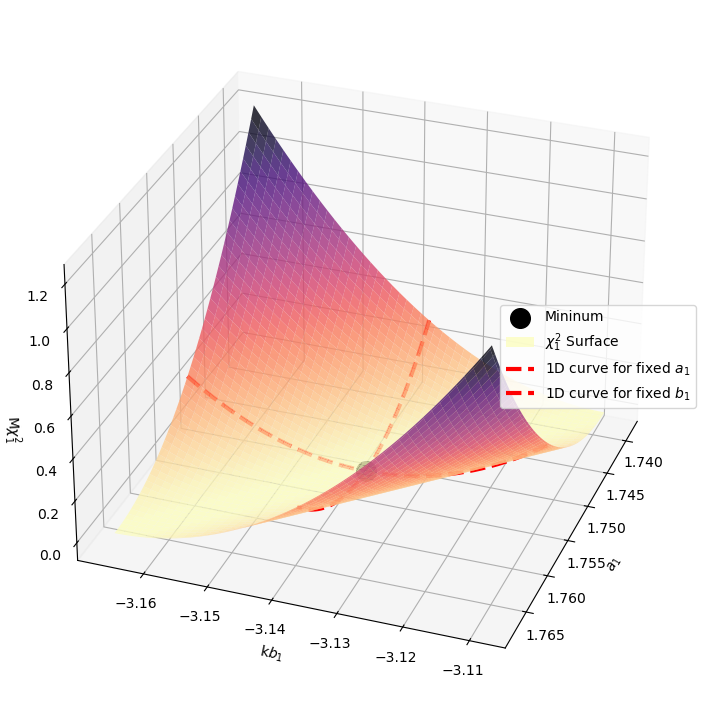

In [71]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(a_1, b_1*(10**(-3)), chi_sqr_stat_m1((a_1,b_1))*(10**(-6)), color='k', s=200, label = "Mininum")
ax.plot_surface(A1_2D, B1_2D*(10**(-3)), (chi_m1)*(10**(-6)), cmap = 'magma_r', label = "$\\chi^2_1$ Surface", alpha = 0.8)
ax.plot(a_c1,b_mult1*(10**(-3)),(curve_a1)*(10**(-6)),color='red', linewidth=3, linestyle = "--", label="1D curve for fixed $a_1$")
ax.plot(a_mult1,b_c1*(10**(-3)),(curve_b1)*(10**(-6)),color='red', linewidth=3, linestyle = "--", label="1D curve for fixed $b_1$")

# Axes labels
ax.set_xlabel("$a_1$")
ax.set_ylabel("k$b_1$")
ax.set_zlabel("M$\\chi^2_1$")

plt.legend(loc=7)

ax.view_init(30,20)
plt.show()

Now, for the **second model**

In [73]:
# Empty matrix ready to receive the values for the surface
chi_m2 = np.zeros_like(A2_2D)
for i in range(chi_m2.shape[0]):
    for j in range(chi_m2.shape[1]):
        chi_m2[i,j] = chi_sqr_stat_m2((A2_2D[i,j],B2_2D[i,j]))

In [74]:
a_c2 = np.ones(a_mult2.shape)*a_2
b_c2 = np.ones(b_mult2.shape)*b_2
curve_a2 = []
curve_b2 = []
for i in range(a_c2.shape[0]):
    curve_a2.append(chi_sqr_stat_m2((a_c2[i],b_mult2[i])))
    curve_b2.append(chi_sqr_stat_m2((a_mult2[i],b_c2[i])))
curve_a2 = np.array(curve_a2)
curve_b2 = np.array(curve_b2)

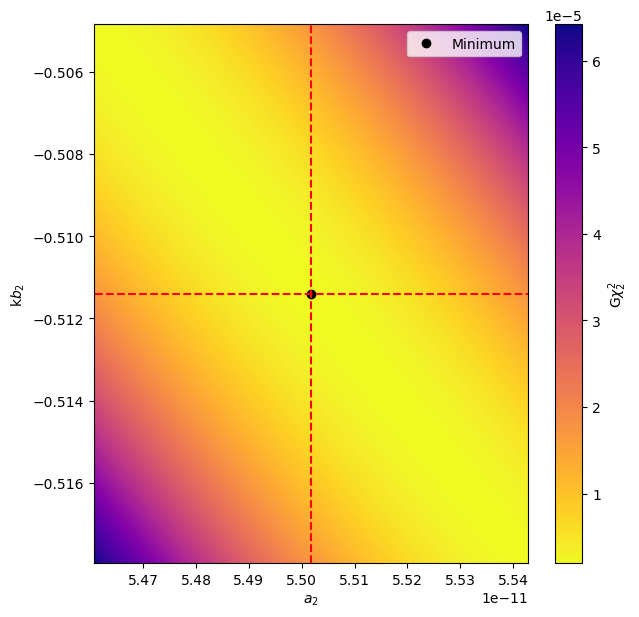

In [75]:
plt.figure(figsize=(7,7))

Z2 = plt.pcolor(A2_2D, B2_2D*(10**(-3)), (chi_m2)*(10**(-9)), cmap = "plasma_r")

plt.plot(a_2,b_2*(10**(-3)),marker="o", color = "k", label = "Minimum", linestyle = " ")
plt.plot(a_c2, b_mult2*(10**(-3)), color = "r", linestyle = "--")
plt.plot(a_mult2, b_c2*(10**(-3)), color = "r", linestyle = "--")

# Add a colour bar
plt.colorbar(Z2, label = "G$\\chi^2_2$")

# Axes labels
plt.xlabel("$a_2$")
plt.ylabel("k$b_2$")

plt.legend()

plt.show()

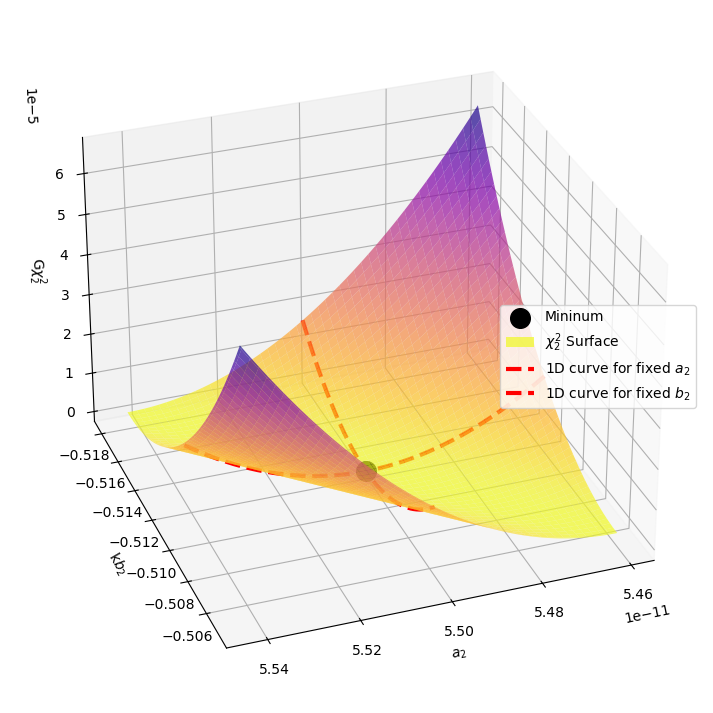

In [76]:
fig2 = plt.figure(figsize=(9,9))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.scatter(a_2, b_2*(10**(-3)), chi_sqr_stat_m2((a_2,b_2))*(10**(-9)), color='k', s=200, label = "Mininum")
ax2.plot_surface(A2_2D, B2_2D*(10**(-3)), (chi_m2)*(10**(-9)), cmap = "plasma_r", label = "$\\chi^2_2$ Surface", alpha = 0.7)
ax2.plot(a_c2,b_mult2*(10**(-3)),(curve_a2)*(10**(-9)),color='red', linewidth=3, linestyle = "--", label="1D curve for fixed $a_2$")
ax2.plot(a_mult2,b_c2*(10**(-3)),(curve_b2)*(10**(-9)),color='red', linewidth=3, linestyle = "--", label="1D curve for fixed $b_2$")

# Axes labels
ax2.set_xlabel("$a_2$")
ax2.set_ylabel("k$b_2$")
ax2.set_zlabel("G$\\chi^2_2$")
plt.legend(loc=7)

ax2.view_init(30,70)
plt.show()

(i) Make a high-quality, labeled, multi-panel figure showing the 2D $\chi^2$ surface of each model: first in 3D, and then in projection with a marker showing the minimum and overimposed contours indicating at least two confidence levels. Briefly comment on your results highlighting the differences between the confidence intervals of both models. What do these confidence intervals tell us? Hint: the maps should have one of the free parameters in the X axis, the other free parameter in the Y axis, and the $\chi^2$ surface in the Z axis.

In [78]:
len(a_mult2)

580

In [79]:
# As we want to get confidence levels, using st library and chi2 module, we can get the values of the confidence levels 
# in order to plug them into our contour plots.

# As we have 2 parameters, then we have 2 degrees of freedom.
dof = 2

# For 10% of certainty
cl_15 = st.chi2.ppf(0.15, dof)
print(f"15% confidence level: {cl_15}")

# For 30% of certainty
cl_30 = st.chi2.ppf(0.9999999, dof)
print(f"65% confidence level: {cl_30}")

# For 60% of certainty
cl_60 = st.chi2.ppf(0.99999999, dof)
print(f"60% confidence level: {cl_60}")

# For 90% of certainty
cl_90 = st.chi2.ppf(0.999999997, dof)
print(f"90% confidence level: {cl_90}")


15% confidence level: 0.3250378589955498
65% confidence level: 32.23619130296935
60% confidence level: 36.84136147785521
90% confidence level: 39.2493070791056


In [80]:
# Define the chi^2 values corresponding to confidence intervals
confidence_levels = [(chi_sqr_stat_m1((a_1,b_1)) + cl_15)*(10**(-6)),(chi_sqr_stat_m1((a_1,b_1)) + cl_30)*(10**(-6)), (chi_sqr_stat_m1((a_1,b_1))+cl_60)*(10**(-6)),(chi_sqr_stat_m1((a_1,b_1))+cl_90)*(10**(-6))]

In [81]:
chi_sqr_stat_m1((a_1,b_1))

2359.3152917878197

In [82]:
confidence_levels

[0.002359640329646815,
 0.002391551483090789,
 0.0023961566532656746,
 0.002398564598866925]

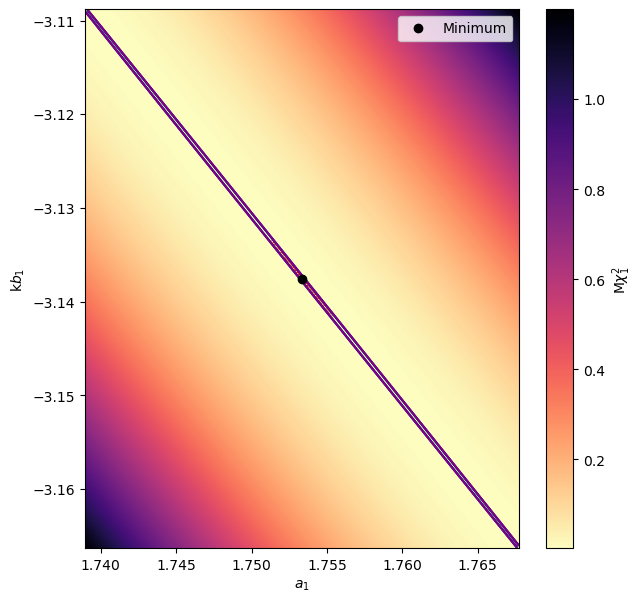

In [83]:
plt.figure(figsize=(7,7))

Z = plt.pcolor(A1_2D, B1_2D*(10**(-3)), (chi_m1)*(10**(-6)), cmap = "magma_r")

# Add contour
plt.contour(A1_2D,B1_2D*(10**(-3)),(chi_m1)*(10**(-6)), levels=confidence_levels, colors = ["r","g","b","purple"])

plt.plot(a_1,b_1*(10**(-3)),marker="o", color = "k", label = "Minimum", linestyle = " ")

# Add a colour bar
plt.colorbar(Z, label = "M$\\chi^2_1$")

# Axes labels
plt.xlabel("$a_1$")
plt.ylabel("k$b_1$")

plt.legend()

plt.show()


In [84]:
# # Create a figure with multiple panels
# fig = plt.figure(figsize=(12, 12))

# # Panel 1: 2D plot
# ax1 = fig.add_subplot(221)  # 2 rows, 2 columns, 1st subplot
# Z = ax1.pcolor(A1_2D, B1_2D*(10**(-3)), (chi_m1)*(10**(-8)), cmap="viridis")

# ax1.plot(a_1, b_1*(10**(-3)), marker="o", color="k", label="Minimum", linestyle=" ")
# ax1.plot(a_c1, b_mult1*(10**(-3)), color="r", linestyle="--")
# ax1.plot(a_mult1, b_c1*(10**(-3)), color="r", linestyle="--")

# contour1 = ax1.contourf(A1_2D, B1_2D*(10**(-3)), chi_m1*(10**(-8)), levels=50, cmap='viridis', alpha=0.7)
# contour_lines1 = ax1.contour(A1_2D, B1_2D*(10**(-3)), chi_m1*(10**(-8)), levels=[chi_sqr_stat_m1((a_1,b_1))*(10**(-8)) + 1,chi_sqr_stat_m1((a_1,b_1))*(10**(-8)) + 4], colors='white', linestyles='dashed')
# ax2.clabel(contour_lines1, inline=True, fontsize=8)


# # Add a color bar
# cbar = plt.colorbar(Z, ax=ax1, label="$\\chi^2_1 \\cdot 10^{-8}$")

# # Axes labels
# ax1.set_xlabel("a")
# ax1.set_ylabel("b $\\cdot 10^{-3}$")
# ax1.legend()

# # Panel 2: 3D plot
# ax2 = fig.add_subplot(222, projection='3d')  # 2 rows, 2 columns, 2nd subplot

# ax2.scatter(a_1, b_1*(10**(-3)), chi_sqr_stat_m1((a_1,b_1))*(10**(-8)), color='k', s=200, label="Minimum")
# ax2.plot_surface(A1_2D, B1_2D*(10**(-3)), (chi_m1)*(10**(-8)), cmap='viridis', alpha=0.5)

# ax2.plot(a_c1, b_mult1*(10**(-3)), (curve_a1)*(10**(-8)), color='red', linewidth=3, linestyle="--", label="1D curve for fixed $a_1$")
# ax2.plot(a_mult1, b_c1*(10**(-3)), (curve_b1)*(10**(-8)), color='red', linewidth=3, linestyle="--", label="1D curve for fixed $b_1$")
# contour_levels1 = [chi_sqr_stat_m1((a_1,b_1))*(10**(-8)) + 1, chi_sqr_stat_m1((a_1,b_1))*(10**(-8)) + 2]  # Adjust as necessary for confidence intervals
# contours1 = ax.contour(A1_2D, B1_2D*(10**(-3)), (chi_m1)*(10**(-8)), zdir='z', offset=np.min((chi_m1)*(10**(-8))), levels=contour_levels1, colors='white')

# # Axes labels
# ax2.set_xlabel("a")
# ax2.set_ylabel("b $\\cdot 10^{-3}$")
# ax2.set_zlabel("$\\chi^2_1\\cdot 10^{-8}$")
# ax2.legend(loc='upper left')

# ax2.view_init(30, 20)

# # Panel 3: 2D plot
# ax3 = fig.add_subplot(223)  # 2 rows, 2 columns, 1st subplot
# Z2 = plt.pcolor(A2_2D, B2_2D*(10**(-3)), (chi_m2)*(10**(-9)), cmap = "plasma")

# plt.plot(a_2,b_2*(10**(-3)),marker="o", color = "k", label = "Minimum", linestyle = " ")
# plt.plot(a_c2, b_mult2*(10**(-3)), color = "r", linestyle = "--")
# plt.plot(a_mult2, b_c2*(10**(-3)), color = "r", linestyle = "--")

# # Add a colour bar
# plt.colorbar(Z2, label = "$\\chi^2_2\\cdot 10^{-9}$")

# # Axes labels
# ax3.set_xlabel("a")
# ax3.set_ylabel("b $\\cdot 10^{-3}$")
# ax3.legend()

# # Panel 4: 3D plot
# ax4 = fig.add_subplot(224, projection='3d')

# ax4.scatter(a_2, b_2*(10**(-3)), chi_sqr_stat_m2((a_2,b_2))*(10**(-9)), color='k', s=200, label = "Mininum")
# ax4.plot_surface(A2_2D, B2_2D*(10**(-3)), (chi_m2)*(10**(-9)), cmap = "plasma", label = "$\\chi^2_2$ Surface", alpha = 0.8)
# ax4.plot(a_c2,b_mult2*(10**(-3)),(curve_a2)*(10**(-9)),color='red', linewidth=3, linestyle = "--", label="1D curve for fixed $a_2$")
# ax4.plot(a_mult2,b_c2*(10**(-3)),(curve_b2)*(10**(-9)),color='red', linewidth=3, linestyle = "--", label="1D curve for fixed $b_2$")

# # Axes labels
# ax4.set_xlabel("a")
# ax4.set_ylabel("b $\\cdot 10^{-3}$")
# ax4.set_zlabel("$\\chi^2_2\\cdot 10^{-9}$")
# ax4.legend(loc='upper left')

# ax4.view_init(30, 70)

# plt.show()

## Problem 2. (5 points) Interpolation: Greenhouse Gases

In this problem, you will calculate and compare the amount of heating produced by three greenhouse gases:

- $\rm CO_2$, which you already analysed in the previous problem.

- $\rm CH_4$, whose data you can find here:
  https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/CapeGrim_CH4_data_download.csv

- $\rm N_2O$, whose data you can find here:
  https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/CapeGrim_N2O_data_download.csv

All the data were taken by the same monitoring station in Australia. The new files for $\rm CH_4$ and $\rm N_2O$ have the same structure as the file for $\rm CO_2$, but the concentrations and standard deviations are in units of $\rm ppb$.

### Tasks:

(a) Repeat steps (a), (b) and (c) of problem 1 for $\rm CH_4$ and $\rm N_2O$. Which of the 3 greenhouse gases has higher and lower concentrations in the atmosphere? How many $\rm dex$ apart are their concentrations? 

(b) Now, you will compute the amount of heat (energy) trapped by the greenhouse gases in the atmosphere by computing the so-called **radiative forcing** ($\Delta F$), which refers to the change in energy balance in the atmosphere due to greenhouse gas concentrations. For each gas the semi-empirical functions read:

- For $\rm CO_2$: $\Delta F_{\text{CO}_2} = \alpha \cdot \ln\left(\frac{C}{C_0}\right)$, where: $\Delta F_{\text{CO}_2}$ is the radiative forcing due to carbon dioxide ($\rm W/m^2$), $\alpha = 5.35 \, \rm W/m^2$, $C$ is the ctime-dependent concentration of $\text{CO}_2 $ in $\rm ppm$, and $C_0$ is the pre-industrial concentration of $\text{CO}_2$ in $\rm ppm$ (typically $=280$).

- For $\text{CH}_4$: $\Delta F_{\text{CH}_4} = \beta \cdot \left(\sqrt{M} - \sqrt{M_0}\right)$, where: $\Delta F_{\text{CH}_4}$ is the radiative forcing due to methane ($\rm W/m^2$), $\beta = 0.036 \, \rm W/m^2 $, $M$ is the time-dependent concentration of $\rm CH_4$ in ppb, and $M_0$ is the pre-industrial concentration of $\text{CH}_4$ in $\rm ppb$ (typically $=700$).

- For $\rm N_2O$: $\Delta F_{\text{N}_2\text{O}} = \gamma \cdot \left(\sqrt{N} - \sqrt{N_0}\right)$, where: $\Delta F_{\text{N}_2\text{O}} $ is the radiative forcing due to nitrous oxide ($\rm W/m^2$), $\gamma = 0.12 \, \rm W/m^2$, $N$ is the time-dependent concentration of $\rm N_2O$ in ppb, $N_0$ is the pre-industrial concentration of $\text{N}_2\text{O}$ in $\rm ppb$ (typically $=270$).

The full expressions can be found in this paper (see table 1): https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016GL071930

(c) Make a single high-quality, labeled plot showing the **radiative forcings** ($\Delta F$) of all three greenhouse gases in units of $\rm W/m^2 $ (including the y-error bars) versus time. How many $\rm dex$ apart are their contributions? Compare with your dex analysis in point (a) and discuss which gas has a higher warming potential.

(d) Now, you need to calculate a **total radiative forcing** ($\Delta F_{\rm total}$) by adding all contributions, but you will notice the data sampling and time arrays do not match. Therefore, before you add the contributions, you will first need to interpolate the individual gas data onto a unified time domain. To achieve this, you should generate a new time array with a 1-year spacing. Then, use **scipy** to interpolate the **radiative forcings** ($\Delta F$) of each gas onto the new time array. Report the interpolation results in a single figure showing the original data and the interpolated data.

(e) Finally, use the interpolated data to calculate the **total radiative forcing** ($\Delta F_{\rm total}=\Delta F_{\text{CO}_2}+\Delta F_{\text{CH}_4}+\Delta F_{\text{N}_2\text{O}}$). Report the result in a high-quality, labeled plot of $\Delta F_{\rm global}$ (in $\rm W/m^2$) versus time in years.

### Solution

(a) Repeat steps (a), (b) and (c) of problem 1 for $\rm CH_4$ and $\rm N_2O$. Which of the 3 greenhouse gases has higher and lower concentrations in the atmosphere? How many $\rm dex$ apart are their concentrations? 



In [88]:
# Defining filenames
filenameCH4 = "CapeGrim_CH4_data_download.csv"
filenameN2O = "CapeGrim_N2O_data_download.csv"

# Inspecting the data with vim, we can see that there are 24 rows as headers.
# df = pd.read_csv(PATH+filenameN2O, skiprows=24)
# df

In [89]:
def io_data_CH4(filename):
    """
    This is an I/O function that opens a file with data
    and return data arrays.
    Input: filename (str)
    Outputs: date (np.array, float) -> time data in years
            ch4 (np.array, float) -> CH4 emission in ppb
            sd (np.array, float) -> instrumental standard deviations in CH4 emissions.

    Author: R.S.S.G.
    Date created: 20/09/2024
    """
    df = pd.read_csv(filename, skiprows=24)
    date = np.array(df["DATE"])
    ch4 = np.array(df["CH4(ppb)"])
    sd = np.array(df["SD(ppb)"])
    return date,ch4,sd

def io_data_N2O(filename):
    """
    This is an I/O function that opens a file with data
    and return data arrays.
    Input: filename (str)
    Outputs: date (np.array, float) -> time data in years
            ch4 (np.array, float) -> CH4 emission in ppb
            sd (np.array, float) -> instrumental standard deviations in CH4 emissions.

    Author: R.S.S.G.
    Date created: 20/09/2024
    """
    df = pd.read_csv(filename, skiprows=24)
    date = np.array(df["DATE"])
    n2o = np.array(df["N2O(ppb)"])
    sd = np.array(df["SD(ppb)"])
    return date,n2o,sd


In [90]:
# Using the previously defined IO functions.
date_CH4, ch4, sd_ins_ch4 = io_data_CH4(PATH + filenameCH4)
date_N2O, n2o, sd_ins_n2o = io_data_N2O(PATH + filenameN2O)

In [91]:
# Defining the more realistic standard deviation
sd_CH4 = 10*sd_ins_ch4
sd_N2O = 10*sd_ins_n2o

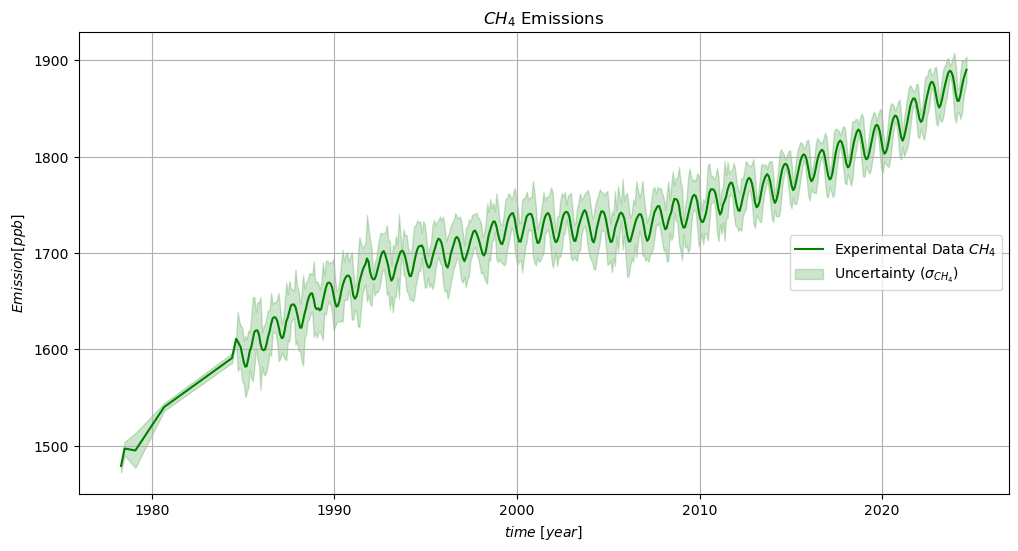

In [92]:
plt.figure(figsize=(12,6))

plt.plot(date_CH4, ch4, color = "g", label = "Experimental Data $CH_4$")

# Only for style, I've used this shaded region to represent standard deviation
plt.fill_between(date_CH4, ch4 - sd_CH4, ch4 + sd_CH4, color='g', alpha=0.2, label="Uncertainty ($\\sigma_{CH_4}$)")

plt.title("$CH_4$ Emissions")
plt.xlabel("$time\\ [year]$")
plt.ylabel("$Emission [ppb]$")
plt.legend(loc=5)

plt.grid()

plt.show()
plt.close()

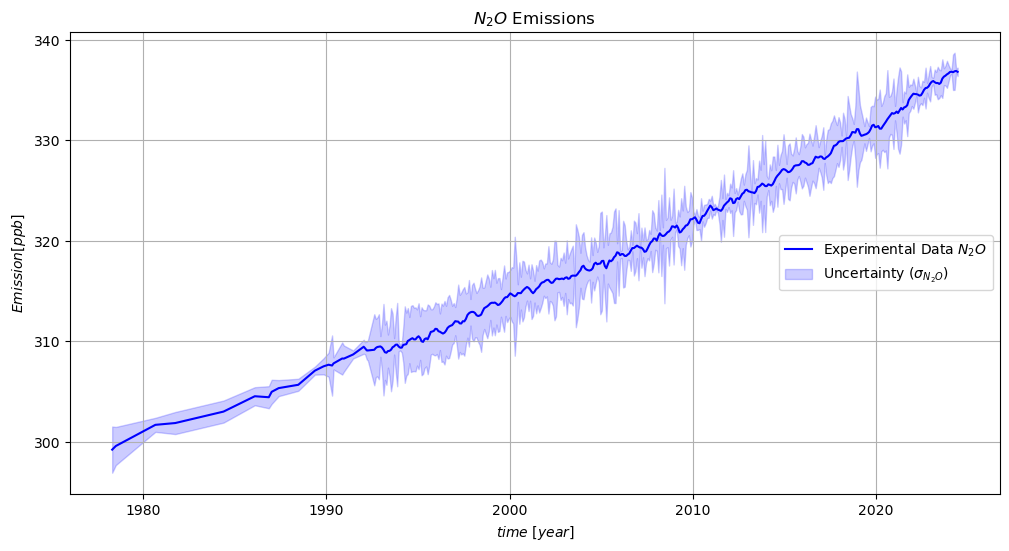

In [93]:
plt.figure(figsize=(12,6))

plt.plot(date_N2O, n2o, color = "b", label = "Experimental Data $N_2O$")

# Only for style, I've used this shaded region to represent standard deviation
plt.fill_between(date_N2O, n2o - sd_N2O, n2o + sd_N2O, color='b', alpha=0.2, label="Uncertainty ($\\sigma_{N_2O}$)")

plt.title("$N_2O$ Emissions")
plt.xlabel("$time\\ [year]$")
plt.ylabel("$Emission [ppb]$")
plt.legend(loc=5)

plt.grid()

plt.show()
plt.close()

Let's see a figure with the 3 of them to compare them

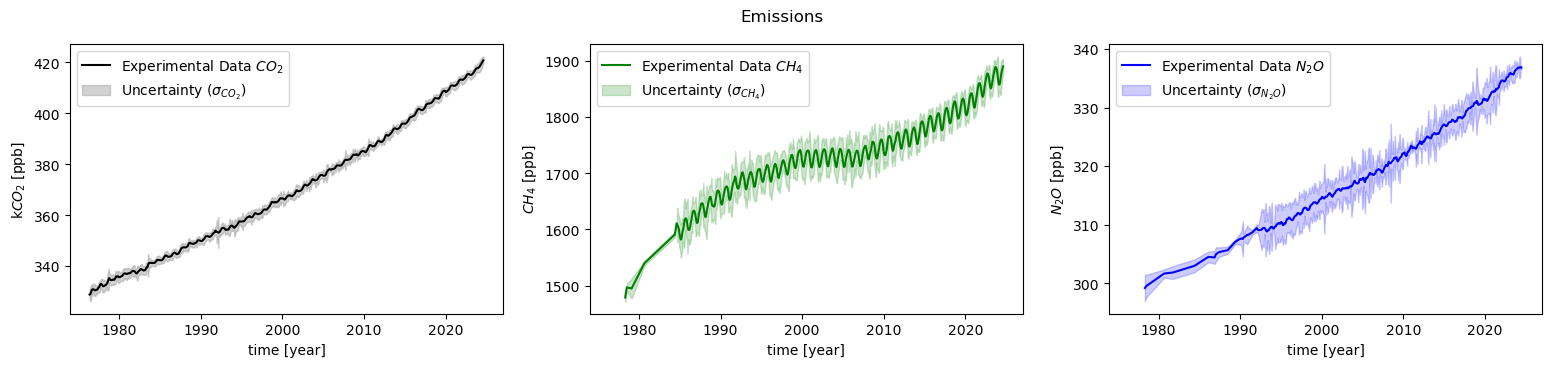

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (19,3.5),sharex = True)
fig.suptitle('Emissions')

ax1.plot(date, co2, color = "k", label = "Experimental Data $CO_2$")
ax1.set_ylabel("k$CO_2$ [ppb]")
ax1.fill_between(date, co2 - sd, co2 + sd, color='gray', alpha=0.35, label="Uncertainty ($\\sigma_{CO_2}$)")


ax2.plot(date_CH4, ch4, color = "g", label = "Experimental Data $CH_4$")
ax2.set_ylabel("$CH_4$ [ppb]")
ax2.fill_between(date_CH4, ch4 - sd_CH4, ch4 + sd_CH4, color='g', alpha=0.2, label="Uncertainty ($\\sigma_{CH_4}$)")


ax3.plot(date_N2O, n2o, color = "b", label = "Experimental Data $N_2O$")
ax3.set_ylabel("$N_2O$ [ppb]")
ax3.fill_between(date_N2O, n2o - sd_N2O, n2o + sd_N2O, color='b', alpha=0.2, label="Uncertainty ($\\sigma_{N_2O}$)")


ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel("time [year]")
ax2.set_xlabel("time [year]")
ax3.set_xlabel("time [year]")

plt.show()

$\bf{CO_2}$ emissions are the highest by far! <br>
$CO_2$ concentrations are 3 orders of magnitude higher than $N_2O$ and 2 orders higher than $CH_4$.

(b) Now, you will compute the amount of heat (energy) trapped by the greenhouse gases in the atmosphere by computing the so-called **radiative forcing** ($\Delta F$), which refers to the change in energy balance in the atmosphere due to greenhouse gas concentrations. For each gas the semi-empirical functions read:

- For $\rm CO_2$: $\Delta F_{\text{CO}_2} = \alpha \cdot \ln\left(\frac{C}{C_0}\right)$, where: $\Delta F_{\text{CO}_2}$ is the radiative forcing due to carbon dioxide ($\rm W/m^2$), $\alpha = 5.35 \, \rm W/m^2$, $C$ is the ctime-dependent concentration of $\text{CO}_2 $ in $\rm ppm$, and $C_0$ is the pre-industrial concentration of $\text{CO}_2$ in $\rm ppm$ (typically $=280$).

- For $\text{CH}_4$: $\Delta F_{\text{CH}_4} = \beta \cdot \left(\sqrt{M} - \sqrt{M_0}\right)$, where: $\Delta F_{\text{CH}_4}$ is the radiative forcing due to methane ($\rm W/m^2$), $\beta = 0.036 \, \rm W/m^2 $, $M$ is the time-dependent concentration of $\rm CH_4$ in ppb, and $M_0$ is the pre-industrial concentration of $\text{CH}_4$ in $\rm ppb$ (typically $=700$).

- For $\rm N_2O$: $\Delta F_{\text{N}_2\text{O}} = \gamma \cdot \left(\sqrt{N} - \sqrt{N_0}\right)$, where: $\Delta F_{\text{N}_2\text{O}} $ is the radiative forcing due to nitrous oxide ($\rm W/m^2$), $\gamma = 0.12 \, \rm W/m^2$, $N$ is the time-dependent concentration of $\rm N_2O$ in ppb, $N_0$ is the pre-industrial concentration of $\text{N}_2\text{O}$ in $\rm ppb$ (typically $=270$).

The full expressions can be found in this paper (see table 1): https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016GL071930


In [98]:
# Defining alpha, beta and gamma constants with the typical values.
alpha = 5.35 #[W/m^2]
beta = 0.036 #[W/m^2]
gamma = 0.12 #[W/m^2]

# Define the preindustrial concentrations.
c_0 = 280
m_0 = 700
n_0 = 270

# Obtaining the values for the radiative forcing  
f_co2 = alpha*np.log((co2/c_0))
f_ch4 = beta*(np.sqrt(ch4) - np.sqrt(m_0))
f_n2o = gamma*(np.sqrt(n2o) - np.sqrt(n_0))

(c) Make a single high-quality, labeled plot showing the **radiative forcings** ($\Delta F$) of all three greenhouse gases in units of $\rm W/m^2 $ (including the y-error bars) versus time. How many $\rm dex$ apart are their contributions? Compare with your dex analysis in point (a) and discuss which gas has a higher warming potential.



In [100]:
# We need to define by error propagation the uncertainties.
# For CO2
sigma_fco2 = alpha*(np.abs(sd/co2))

# For CH4
sigma_fch4 = (beta*np.abs(sd_CH4))/(2*np.sqrt(np.abs(ch4)))

# For CH4
sigma_fn2o = (gamma*np.abs(sd_N2O))/(2*np.sqrt(np.abs(n2o)))


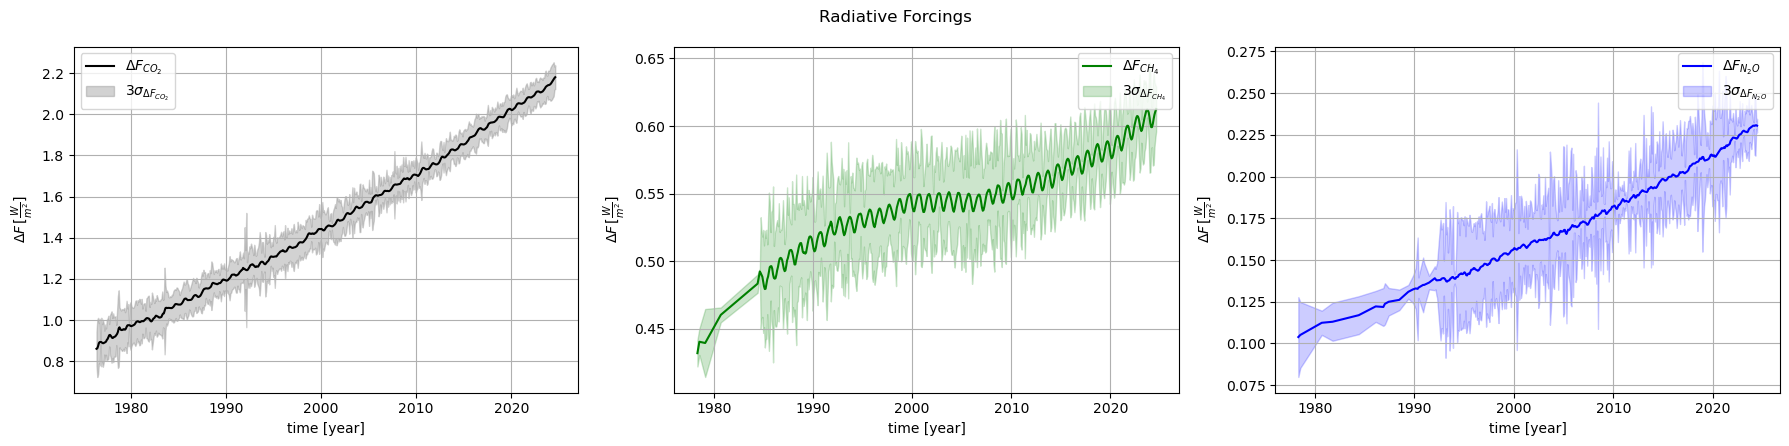

In [101]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,4.5))
fig.suptitle('Radiative Forcings')

ax1.plot(date, f_co2, color = "k", label = "$\\Delta F_{CO_2}$")
ax1.fill_between(date, f_co2 - 3*sigma_fco2, f_co2 + 3*sigma_fco2, color='gray', alpha=0.35, label="$3\\sigma_{\\Delta F_{CO_2}}$")
ax1.grid()

ax2.plot(date_CH4, f_ch4, color = "g", label = "$\\Delta F_{CH_4}$")
ax2.fill_between(date_CH4, f_ch4 - 3*sigma_fch4, f_ch4 + 3*sigma_fch4, color='g', alpha=0.2, label="$3\\sigma_{\\Delta F_{CH_4}}$")
ax2.grid()

ax3.plot(date_N2O, f_n2o, color = "b", label = "$\\Delta F_{N_2O}$")
ax3.fill_between(date_N2O, f_n2o - 3*sigma_fn2o, f_n2o + 3*sigma_fn2o, color='b', alpha=0.2, label="$3\\sigma_{\\Delta F_{N_2O}}$")
ax3.grid()

ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel("time [year]")
ax2.set_xlabel("time [year]")
ax3.set_xlabel("time [year]")
ax1.set_ylabel("$\\Delta F \\, [\\frac{W}{m^2}]$")
ax2.set_ylabel("$\\Delta F \\, [\\frac{W}{m^2}]$")
ax3.set_ylabel("$\\Delta F \\, [\\frac{W}{m^2}]$")

plt.tight_layout()
plt.show()

Now, fixing the y-axis to get a better comparison!

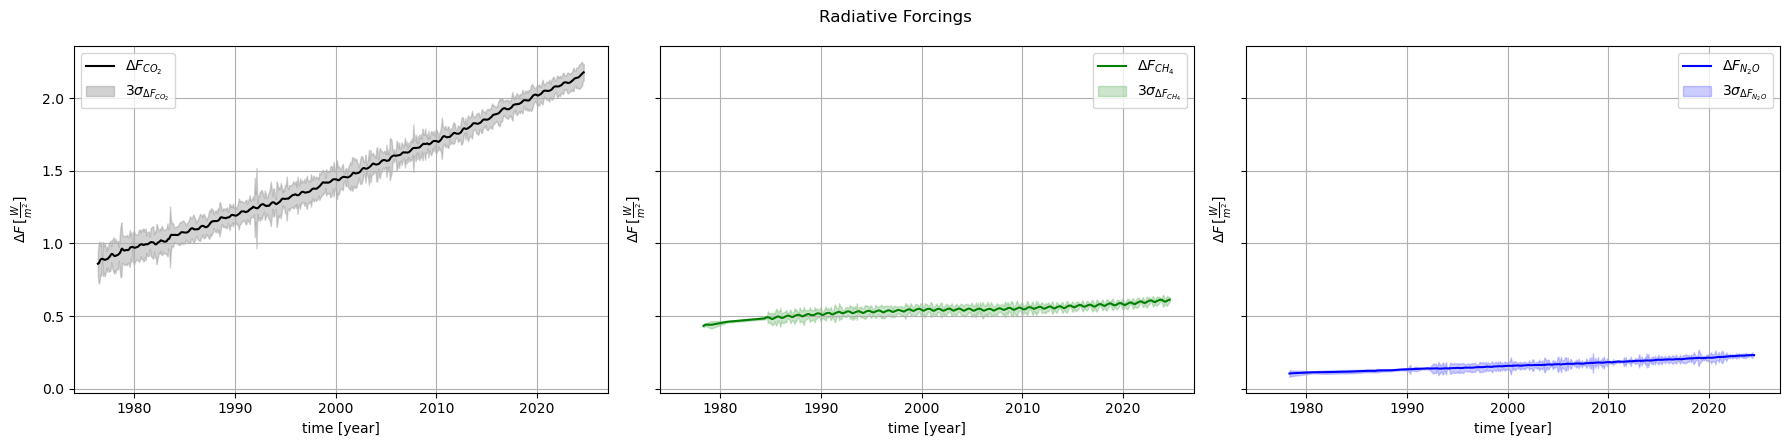

In [103]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,4.5),sharey = True, sharex = True)
fig.suptitle('Radiative Forcings')

ax1.plot(date, f_co2, color = "k", label = "$\\Delta F_{CO_2}$")
ax1.fill_between(date, f_co2 - 3*sigma_fco2, f_co2 + 3*sigma_fco2, color='gray', alpha=0.35, label="$3\\sigma_{\\Delta F_{CO_2}}$")
ax1.grid()

ax2.plot(date_CH4, f_ch4, color = "g", label = "$\\Delta F_{CH_4}$")
ax2.fill_between(date_CH4, f_ch4 - 3*sigma_fch4, f_ch4 + 3*sigma_fch4, color='g', alpha=0.2, label="$3\\sigma_{\\Delta F_{CH_4}}$")
ax2.grid()

ax3.plot(date_N2O, f_n2o, color = "b", label = "$\\Delta F_{N_2O}$")
ax3.fill_between(date_N2O, f_n2o - 3*sigma_fn2o, f_n2o + 3*sigma_fn2o, color='b', alpha=0.2, label="$3\\sigma_{\\Delta F_{N_2O}}$")
ax3.grid()

ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel("time [year]")
ax2.set_xlabel("time [year]")
ax3.set_xlabel("time [year]")
ax1.set_ylabel("$\\Delta F \\, [\\frac{W}{m^2}]$")
ax2.set_ylabel("$\\Delta F \\, [\\frac{W}{m^2}]$")
ax3.set_ylabel("$\\Delta F \\, [\\frac{W}{m^2}]$")

plt.tight_layout()
plt.show()

Again, $CO_2$ has the highest warming potential as expected from common knowledge! <br>
Also, as the relation between $\Delta F$ and the emissions are directly proportional and the data is above the pre-industrial concentrations, then they conserve the order that we previously saw in the emissions vs time plots.  

(d) Now, you need to calculate a **total radiative forcing** ($\Delta F_{\rm total}$) by adding all contributions, but you will notice the data sampling and time arrays do not match. Therefore, before you add the contributions, you will first need to interpolate the individual gas data onto a unified time domain. To achieve this, you should generate a new time array with a 1-year spacing. Then, use **scipy** to interpolate the **radiative forcings** ($\Delta F$) of each gas onto the new time array. Report the interpolation results in a single figure showing the original data and the interpolated data.


In [106]:
# Let's get a common range by looking at the max and min values
# We need to have a range shared by the three arrays in order to get the interpolation working 
print(np.min([date[0],date_CH4[0],date_N2O[0]]))
print(np.max([date[-1],date_CH4[-1],date_N2O[-1]]))

1976.3689
2024.62022


In [107]:
# Generating a new time array. Where the range goes from the min and max values.
# Notice that this array will have less resolution as it only has a 1-year spacing between elements!
new_date = np.arange(int(np.max([date[0],date_CH4[0],date_N2O[0]]))+1,(np.min([date[-1],date_CH4[-1],date_N2O[-1]])),1)

# Checking if the array has a 1-year spacing and also its shape.
print(new_date, new_date.shape)

[1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990.
 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002.
 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014.
 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022. 2023. 2024.] (46,)


In [108]:
# As we have time series, we'll use interp.interp1d
# We've chosen linear kind as it seems to be the natural choice looking at the plots!

int_fco2 = interp.interp1d(date, f_co2, kind = "linear")
int_fch4 = interp.interp1d(date_CH4, f_ch4, kind = "linear")
int_fn2o = interp.interp1d(date_N2O, f_n2o, kind = "linear")

In [109]:
new_fco2 = int_fco2(new_date)
new_fch4 = int_fch4(new_date)
new_fn2o = int_fn2o(new_date)

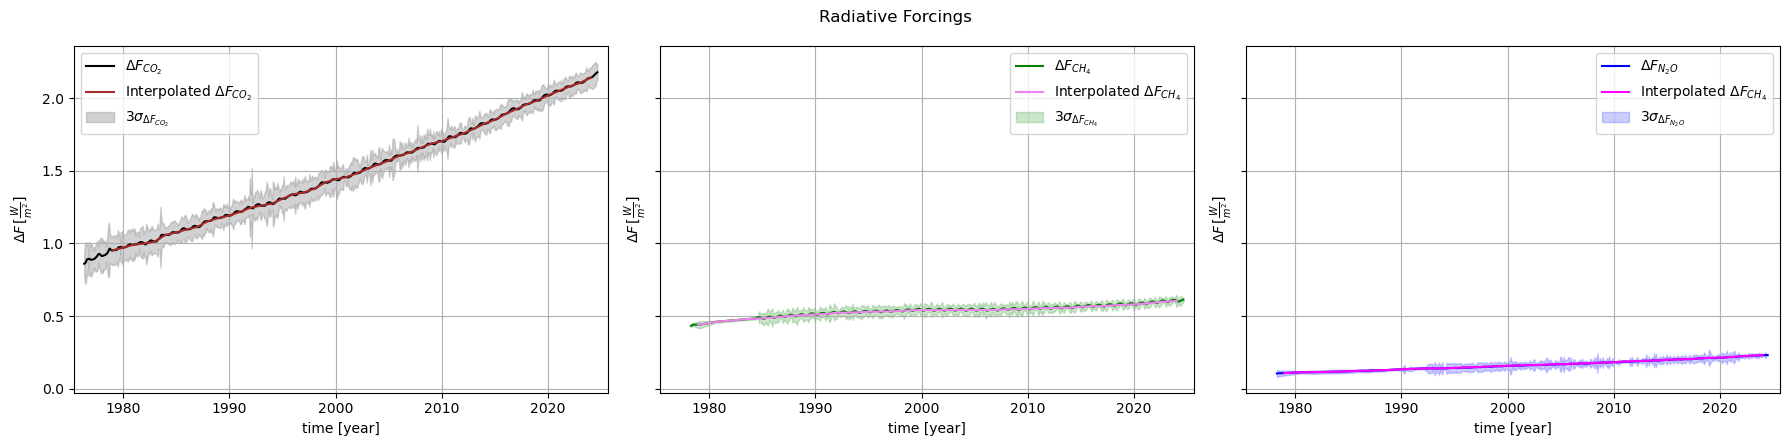

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,4.5),sharey = True, sharex = True)
fig.suptitle('Radiative Forcings')

ax1.plot(date, f_co2, color = "k", label = "$\\Delta F_{CO_2}$")
ax1.plot(new_date, new_fco2, color = "brown", label = "Interpolated $\\Delta F_{CO_2}$")

ax1.fill_between(date, f_co2 - 3*sigma_fco2, f_co2 + 3*sigma_fco2, color='gray', alpha=0.35, label="$3\\sigma_{\\Delta F_{CO_2}}$")
ax1.grid()

ax2.plot(date_CH4, f_ch4, color = "g", label = "$\\Delta F_{CH_4}$")
ax2.plot(new_date, new_fch4, color = "violet", label = "Interpolated $\\Delta F_{CH_4}$")
ax2.fill_between(date_CH4, f_ch4 - 3*sigma_fch4, f_ch4 + 3*sigma_fch4, color='g', alpha=0.2, label="$3\\sigma_{\\Delta F_{CH_4}}$")
ax2.grid()

ax3.plot(date_N2O, f_n2o, color = "b", label = "$\\Delta F_{N_2O}$")
ax3.plot(new_date, new_fn2o, color = "magenta", label = "Interpolated $\\Delta F_{CH_4}$")
ax3.fill_between(date_N2O, f_n2o - 3*sigma_fn2o, f_n2o + 3*sigma_fn2o, color='b', alpha=0.2, label="$3\\sigma_{\\Delta F_{N_2O}}$")
ax3.grid()

ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel("time [year]")
ax2.set_xlabel("time [year]")
ax3.set_xlabel("time [year]")
ax1.set_ylabel("$\\Delta F \\, [\\frac{W}{m^2}]$")
ax2.set_ylabel("$\\Delta F \\, [\\frac{W}{m^2}]$")
ax3.set_ylabel("$\\Delta F \\, [\\frac{W}{m^2}]$")
plt.xlim(np.min([date[0],date_CH4[0],date_N2O[0]])-1,np.max([date[-1],date_CH4[-1],date_N2O[-1]])+1)

plt.tight_layout()
plt.show()

If we plot the 3 of them in a single plot

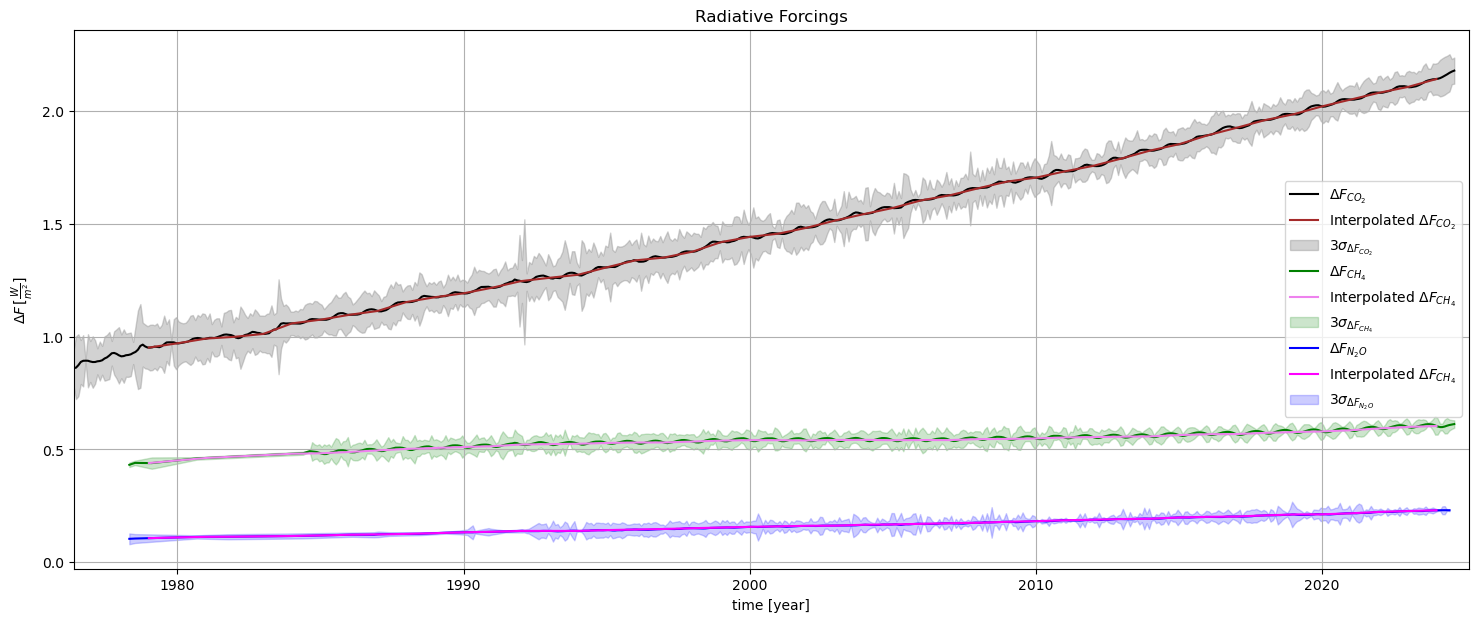

In [112]:
plt.figure(figsize = (18,7))
plt.title('Radiative Forcings')

plt.plot(date, f_co2, color = "k", label = "$\\Delta F_{CO_2}$")
plt.plot(new_date, new_fco2, color = "brown", label = "Interpolated $\\Delta F_{CO_2}$")

plt.fill_between(date, f_co2 - 3*sigma_fco2, f_co2 + 3*sigma_fco2, color='gray', alpha=0.35, label="$3\\sigma_{\\Delta F_{CO_2}}$")

plt.plot(date_CH4, f_ch4, color = "g", label = "$\\Delta F_{CH_4}$")
plt.plot(new_date, new_fch4, color = "violet", label = "Interpolated $\\Delta F_{CH_4}$")
plt.fill_between(date_CH4, f_ch4 - 3*sigma_fch4, f_ch4 + 3*sigma_fch4, color='g', alpha=0.2, label="$3\\sigma_{\\Delta F_{CH_4}}$")

plt.plot(date_N2O, f_n2o, color = "b", label = "$\\Delta F_{N_2O}$")
plt.plot(new_date, new_fn2o, color = "magenta", label = "Interpolated $\\Delta F_{CH_4}$")
plt.fill_between(date_N2O, f_n2o - 3*sigma_fn2o, f_n2o + 3*sigma_fn2o, color='b', alpha=0.2, label="$3\\sigma_{\\Delta F_{N_2O}}$")

plt.xlabel("time [year]")
plt.ylabel("$\\Delta F \\, [\\frac{W}{m^2}]$")

plt.xlim(np.min([date[0],date_CH4[0],date_N2O[0]]),np.max([date[-1],date_CH4[-1],date_N2O[-1]])+0.5)

plt.legend(loc=7)

plt.grid()

plt.show()

Zooming in ...

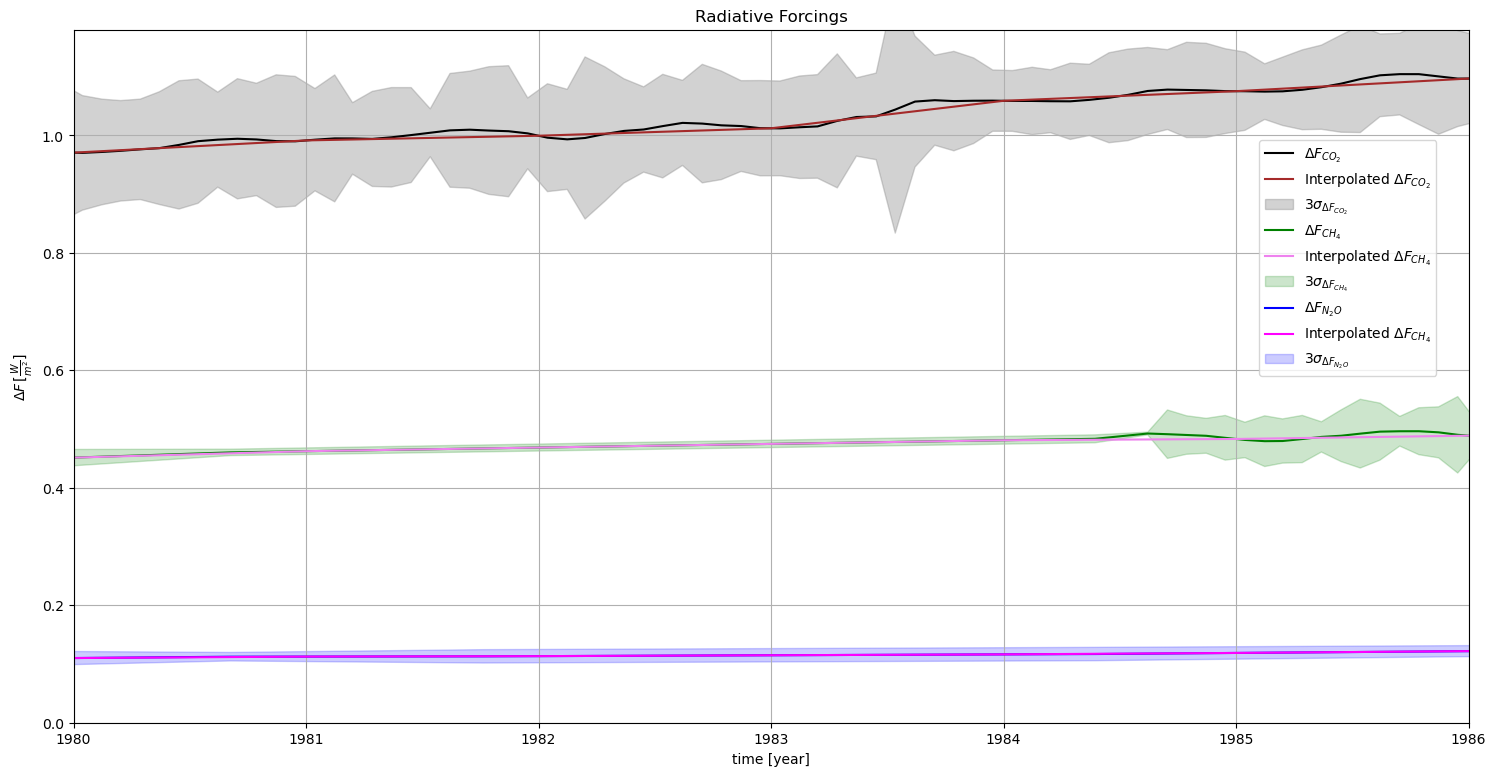

In [114]:
plt.figure(figsize = (18,9))
plt.title('Radiative Forcings')

plt.plot(date, f_co2, color = "k", label = "$\\Delta F_{CO_2}$")
plt.plot(new_date, new_fco2, color = "brown", label = "Interpolated $\\Delta F_{CO_2}$")

plt.fill_between(date, f_co2 - 3*sigma_fco2, f_co2 + 3*sigma_fco2, color='gray', alpha=0.35, label="$3\\sigma_{\\Delta F_{CO_2}}$")

plt.plot(date_CH4, f_ch4, color = "g", label = "$\\Delta F_{CH_4}$")
plt.plot(new_date, new_fch4, color = "violet", label = "Interpolated $\\Delta F_{CH_4}$")
plt.fill_between(date_CH4, f_ch4 - 3*sigma_fch4, f_ch4 + 3*sigma_fch4, color='g', alpha=0.2, label="$3\\sigma_{\\Delta F_{CH_4}}$")

plt.plot(date_N2O, f_n2o, color = "b", label = "$\\Delta F_{N_2O}$")
plt.plot(new_date, new_fn2o, color = "magenta", label = "Interpolated $\\Delta F_{CH_4}$")
plt.fill_between(date_N2O, f_n2o - 3*sigma_fn2o, f_n2o + 3*sigma_fn2o, color='b', alpha=0.2, label="$3\\sigma_{\\Delta F_{N_2O}}$")

plt.xlabel("time [year]")
plt.ylabel("$\\Delta F \\, [\\frac{W}{m^2}]$")

plt.xlim(1980,1986)
plt.ylim(0,1.18)

plt.legend(loc=(0.85,0.5))

plt.grid()

plt.show()

(e) Finally, use the interpolated data to calculate the **total radiative forcing** ($\Delta F_{\rm total}=\Delta F_{\text{CO}_2}+\Delta F_{\text{CH}_4}+\Delta F_{\text{N}_2\text{O}}$). Report the result in a high-quality, labeled plot of $\Delta F_{\rm global}$ (in$\rm W/m^2$) versus time in years.

In [116]:
# Now we sum all the contributions
f_total = new_fco2 + new_fch4 + new_fn2o

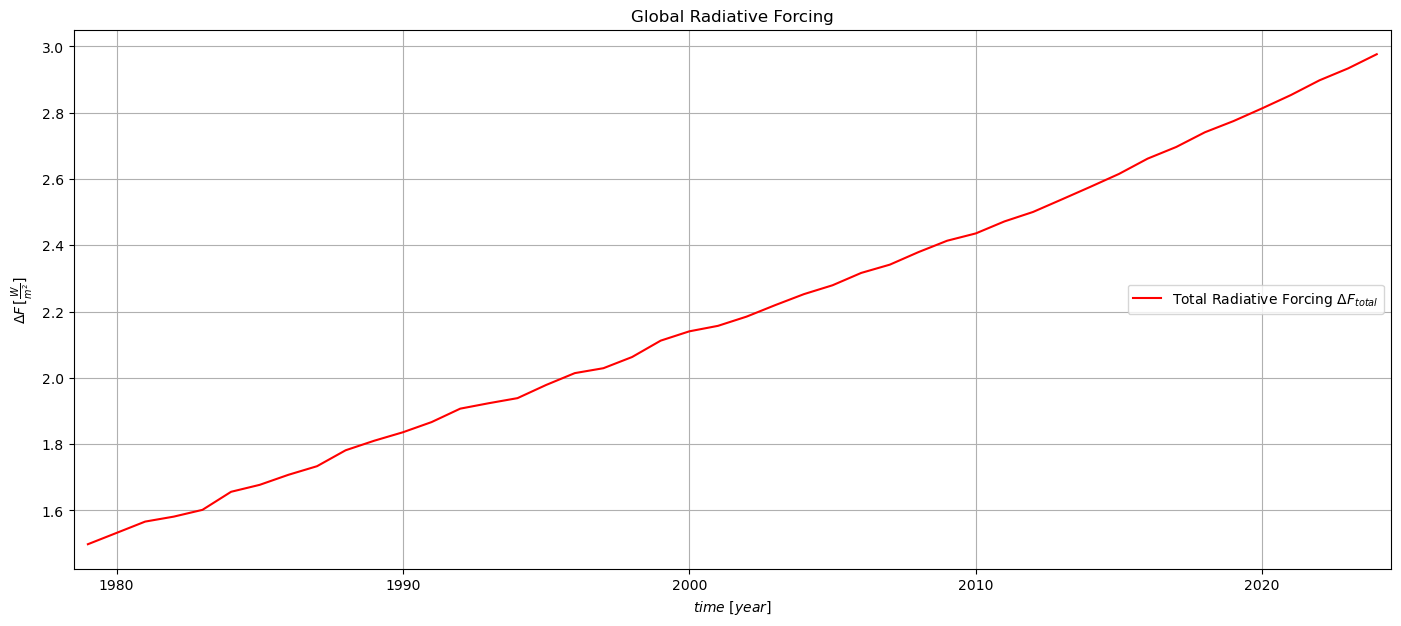

In [117]:
plt.figure(figsize=(17,7))

plt.plot(new_date, f_total, color = "r", label = "Total Radiative Forcing $\\Delta F_{total}$")

plt.title("Global Radiative Forcing")
plt.xlabel("$time\\ [year]$")
plt.ylabel("$\\Delta F \\, [\\frac{W}{m^2}]$")


plt.xlim(new_date[0]-0.5, new_date[-1]+0.5)
plt.legend(loc=5)

plt.grid()

plt.show()
plt.close()

## Problem 3. (6 points) Extrapolation: Global Warming

In this problem, you will study the correlation between the total radiative forcing ($\Delta F_{\rm total}$) and the sea temperature anomaly, which is an indicator of global warming. The sea temperature anomaly ($\Delta T_{\rm sea}$ in $\rm ^{\circ}C$) is measured with respect to the average global sea surface temperature (SST) in the 1961-1990 period ($=13.97\,\rm ^{\circ}C$). The observed data values are reported in this file:

https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/temperature-anomaly.csv

The file was taken from: https://ourworldindata.org

### Tasks:

(a) Create a python function that reads in the **temperature-anomaly.csv** file, selects the rows corresponding to the "Southern Hemisphere" anomaly, and returns the median temperature anomaly and symmetric $2\sigma$ y-errors computed from the upper and lower bounds given in the file. **Hint:** to calculate the symmetric $2\sigma$ y-errors, you can read the columns "Upper bound (95% CI)" and "Lower bound (95% CI)" and then average them.

(b) Make a high-quality, labeled figure of the sea temperature anomaly (in $\rm ^{\circ}C$) versus time (in years), including the symmetric $2\sigma$ y-errors for the temperature anomaly. What trend/s do you see? Briefly comment.

(c) Since you want to study the correlation between the global radiative forcing ($\Delta F_{\rm total}$) from problem 2 and the sea temperature anomaly, both series need to cover the same time period in years. Use conditionals to select only the overlapping time periods, so that both data frames cover the same time ranges. Then, create and export (in CSV format) a new pandas data frame that contains 4 columns:

- Year

- Total radiative forcing ($\Delta F_{\rm total}$)

- Sea temperature anomaly 

- $2\sigma$ error in the sea temperature anommaly


(d) Make a labeled scatter plot (using markers) of the sea temperature anomaly (including the $2\sigma$ y-error bars) versus the total radiative forcing ($\Delta F_{\rm total}$. What trend/s do you see?

(e) Assume a linear model and carry out a regression. Report the resulting equation and figure showing the original data, the linear fit, and the literature prediction line: $\Delta T_{\rm sea}=k\,\Delta F_{\rm total}$, where $k=0.29\pm0.08\,\rm ^{\circ}C\,m^2/W$. How well does your regression result compare to the literature? Briefly discuss your results.

(f) Finally, you will make predictions for the future. Imagine the observed trends in greenhouse concentrations will continue in the next years. Use your regression model to predict $\Delta T_{\rm sea}$ in the years $2050$ and $2100$ via extrapolation. Report your results with uncertainties and show the expected trends in a figure. How much will the sea temperature have increased by those two years with respect to the reference SST?

## Solution

a) Create a python function that reads in the **temperature-anomaly.csv** file, selects the rows corresponding to the "Southern Hemisphere" anomaly, and returns the median temperature anomaly and symmetric $2\sigma$ y-errors computed from the upper and lower bounds given in the file. **Hint:** to calculate the symmetric $2\sigma$ y-errors, you can read the columns "Upper bound (95% CI)" and "Lower bound (95% CI)" and then average them.

In [121]:
filename_temp = "temperature-anomaly.csv"

In [122]:
# Procedural coding
pd.read_csv(PATH+filename_temp)[pd.read_csv(PATH+filename_temp)["Entity"]=="Southern Hemisphere"]#["Median temperature anomaly from 1961-1990 average"]#[pd.read_csv(PATH+filename_temp)["Year"] >= 1961][pd.read_csv(PATH+filename_temp)["Year"] <= 1990]

,Entity,Code,Year,Median temperature anomaly from 1961-1990 average,Upper bound (95% CI),Lower bound (95% CI)
340,Southern Hemisphere,NaN,1850,-0.408,-0.382,-0.451
341,Southern Hemisphere,NaN,1851,-0.277,-0.249,-0.322
342,Southern Hemisphere,NaN,1852,-0.349,-0.323,-0.390
343,Southern Hemisphere,NaN,1853,-0.361,-0.341,-0.403
344,Southern Hemisphere,NaN,1854,-0.425,-0.403,-0.463
...,...,...,...,...,...,...
505,Southern Hemisphere,NaN,2015,0.497,0.548,0.455
506,Southern Hemisphere,NaN,2016,0.531,0.584,0.488
507,Southern Hemisphere,NaN,2017,0.434,0.486,0.390
508,Southern Hemisphere,NaN,2018,0.405,0.461,0.360


In [123]:
# Not sure if this is the correct way of getting the 2 sigma symmetric 
# df = pd.read_csv(PATH+filename_temp)
# mean = np.array(df[df["Entity"] == "Southern Hemisphere"]["Median temperature anomaly from 1961-1990 average"])
# upper_bound =  np.array(df[df["Entity"] == "Southern Hemisphere"]["Upper bound (95% CI)"])
# lower_bound =  np.array(df[df["Entity"] == "Southern Hemisphere"]["Lower bound (95% CI)"])
# y_err = np.abs((upper_bound + lower_bound)/2)
# Or this one
# std = []
# for i in range(len(upper_bound)):
#     std.append(np.std(np.array([upper_bound[i],lower_bound[i]])))
# std = np.array(std)

In [124]:
def io_data_temp(filename):
    """
    This is an I/O function that opens a file with data
    and return data arrays.
    Input: filename (str)
    Outputs: mean (np.array, float) -> median temperature anomaly 
            y_err (np.array, float) -> symmetric 2 sigma 
            time (np.array, float) -> year
    Author: R.S.S.G.
    Date created: 08/10/2024
    """
    df = pd.read_csv(filename)
    mean = np.array(df[df["Entity"] == "Southern Hemisphere"]["Median temperature anomaly from 1961-1990 average"])
    upper_bound =  np.array(df[df["Entity"] == "Southern Hemisphere"]["Upper bound (95% CI)"])
    lower_bound =  np.array(df[df["Entity"] == "Southern Hemisphere"]["Lower bound (95% CI)"])
    # To return symmetric errors, I've take the difference instead of the average.
    y_err = np.abs((upper_bound - lower_bound)/2)
    
    return mean, y_err

In [125]:
sea_mean, sea_err = io_data_temp(PATH+filename_temp)

(b) Make a high-quality, labeled figure of the sea temperature anomaly (in $\rm ^{\circ}C$) versus time (in years), including the symmetric $2\sigma$ y-errors for the temperature anomaly. What trend/s do you see? Briefly comment.

In [127]:
# Generating a new time/year vector from 1850 to 2019
sea_date = np.arange(1850, 2020, 1)

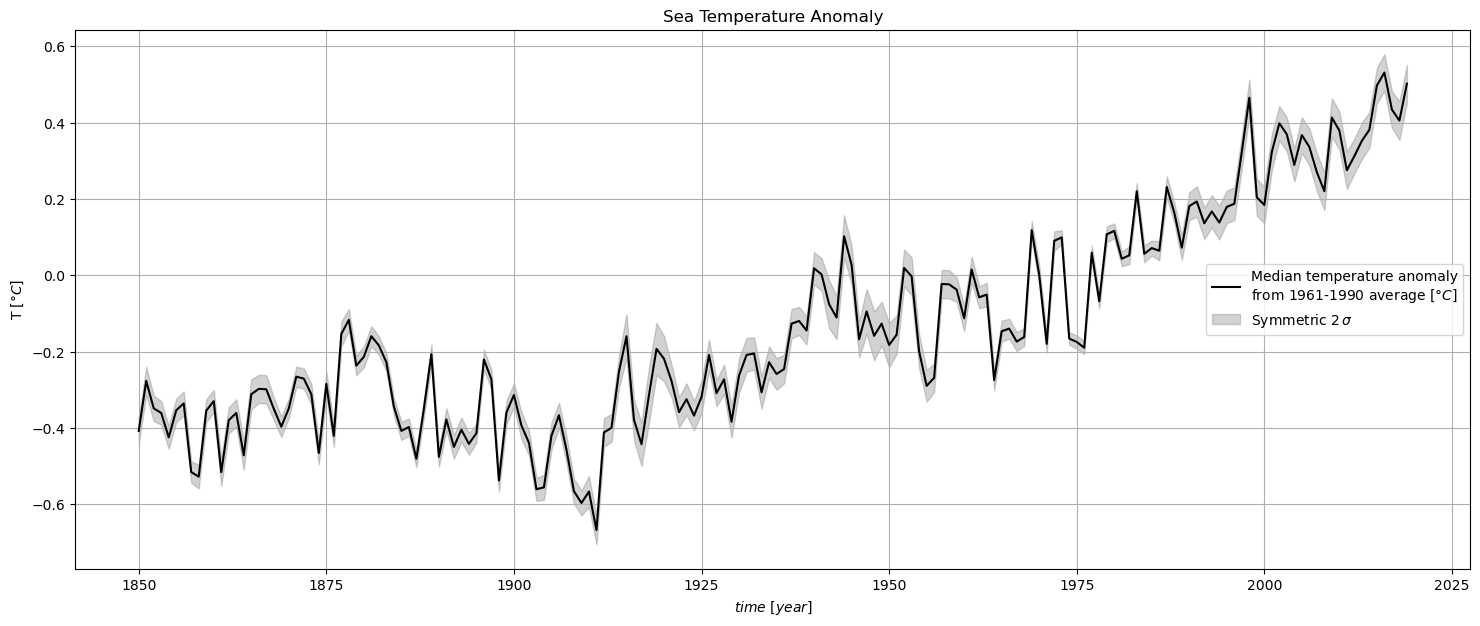

In [128]:
plt.figure(figsize=(18,7))

plt.plot(sea_date, sea_mean, color = "k", label = "Median temperature anomaly\nfrom 1961-1990 average [$\\degree C$]")
plt.fill_between(sea_date, sea_mean - sea_err, sea_mean + sea_err, color='gray', alpha=0.35, label="Symmetric $2\\, \\sigma$")

plt.title("Sea Temperature Anomaly")
plt.xlabel("$time\\ [year]$")
plt.ylabel("T [$\\degree C$]")

plt.legend(loc=5)

plt.grid()

plt.show()
plt.close()

We can see three stages. <br>
The first one, from 1850 to 1925, the sea temperature anomaly is roughly constant. <br>
In the second one, from 1925 to 1975, the sea temperature anomaly starts to grow. <br>
And finally, from 1975 the sea temperature anomaly grows entirely! And, noticeable, the sea temperature anomaly is positive!


(c) Since you want to study the correlation between the global radiative forcing ($\Delta F_{\rm total}$) from problem 2 and the sea temperature anomaly, both series need to cover the same time period in years. Use conditionals to select only the overlapping time periods, so that both data frames cover the same time ranges. Then, create and export (in CSV format) a new pandas data frame that contains 4 columns:

- Year

- Total radiative forcing ($\Delta F_{\rm total}$)

- Sea temperature anomaly 

- $2\sigma$ error in the sea temperature anommaly



In [131]:
print("The minimum common value in the date arrays for the total radiative forcing and sea data is: ", np.max([new_date[0], sea_date[0]]), "\nThe maximum value is: ", np.min([new_date[-1], sea_date[-1]]))

The minimum common value in the date arrays for the total radiative forcing and sea data is:  1979.0 
The maximum value is:  2019.0


In [132]:
# Defining the common time range
time_range = np.arange(np.max([new_date[0], sea_date[0]]),np.min([new_date[-1], sea_date[-1]])+1,1)

In [133]:
#time_range

In [134]:
# Using conditionals to get the indexes of the overlapping time periods
ind_sea = np.where((sea_date >= np.max(([new_date[0], sea_date[0]]))) & (sea_date <= np.min([new_date[-1], sea_date[-1]])))
ind_new = np.where((new_date >= np.max(([new_date[0], sea_date[0]]))) & (new_date <= np.min([new_date[-1], sea_date[-1]])))
# Extracting the indexes as arrays
ind_sea = ind_sea[0]
ind_new = ind_new[0]

In [135]:
# Getting the values of total forcing, sea temperature and two sigma symmetric  anomaly in the common time range.
f_total_c = f_total[ind_new]
sea_mean_c = sea_mean[ind_sea]
sea_err_c = sea_err[ind_sea]

In [136]:
# So, both f_total and sea_mean with the obtained indexes should have the same length as they cover the same time range
print(f_total_c.shape,sea_mean_c.shape, sea_err_c.shape)

(41,) (41,) (41,)


In [137]:
# Creating a dictionary to then convert it to a pandas dataframe
dfdic = {"Year": time_range, "Total radiative forcing": f_total_c, "Sea temperature anomaly": sea_mean_c, "2 sigma error in the sea temperature anomaly": sea_err_c }

In [138]:
# Getting the Pandas DataFrame
df = pd.DataFrame(dfdic)
#df

In [139]:
# Creating a correlation.csv file
df.to_csv("correlation.csv", index = False)


(d) Make a labeled scatter plot (using markers) of the sea temperature anomaly (including the $2\sigma$ y-error bars) versus the total radiative forcing ($\Delta F_{\rm total}$. What trend/s do you see?

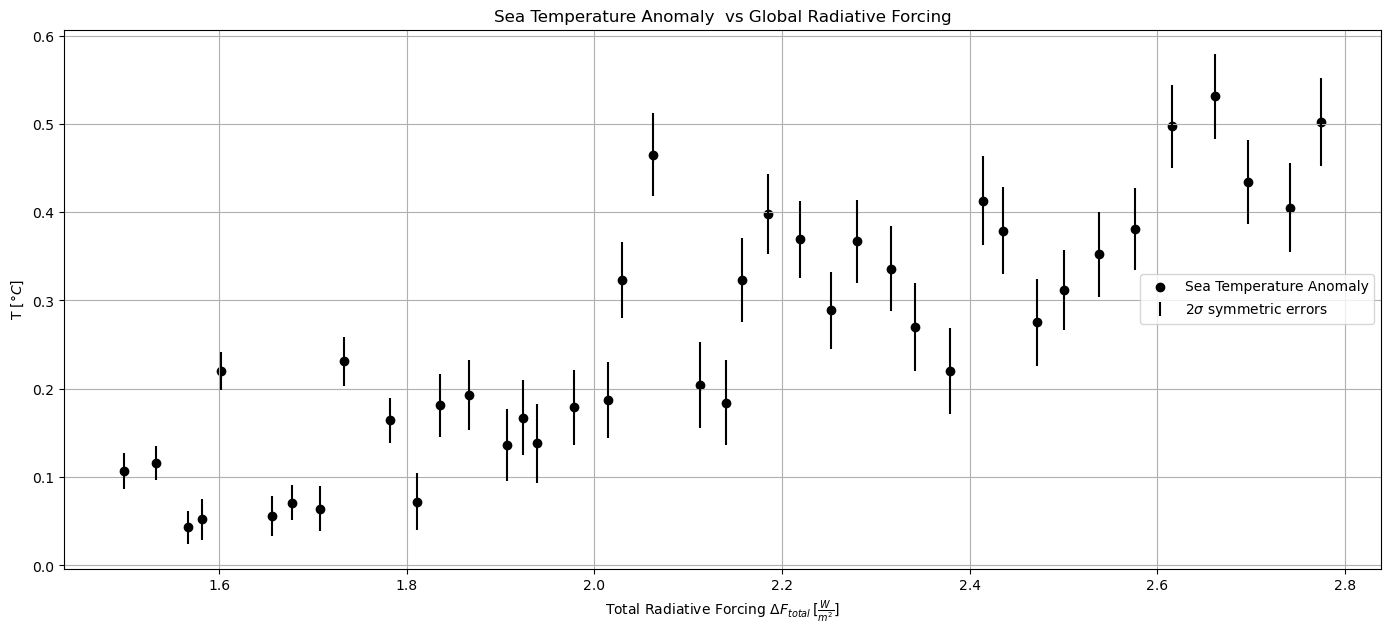

In [141]:
plt.figure(figsize=(17,7))

plt.scatter(f_total_c, sea_mean_c, color = "k", label = "Sea Temperature Anomaly")
plt.errorbar(f_total_c, sea_mean_c, yerr = sea_err_c, color = "k", linestyle = " ", marker = " ",label = "$2\\sigma$ symmetric errors")

plt.title("Sea Temperature Anomaly  vs Global Radiative Forcing")
plt.xlabel("Total Radiative Forcing$\\ \\Delta F_{total} \\, [\\frac{W}{m^2}]$")
plt.ylabel("T [$\\degree C$]")

plt.legend(loc=5)

plt.grid()

plt.show()
plt.close()

It seems like the relation between the global radiative forcing and the sea temperature anomaly is increasing monotonic.<br>
Now, as we don't have much data, it also seems like the relation is linear. <br>
We should get the values of Pearson and Spearman coefficients to have a more accurate view.

In [143]:
sp = st.spearmanr(f_total_c, sea_mean_c)
pe = st.pearsonr(f_total_c, sea_mean_c)

In [144]:
print('Spearman coefficient: %.5f , with pvalue: %.5f' % (sp[0],sp[1]))
print('Pearson coefficient: %.5f , with pvalue: %.5f' % (pe[0],pe[1]))
print("It seems like we don't have a monotonic correlation nor linear")

Spearman coefficient: 0.85609 , with pvalue: 0.00000
Pearson coefficient: 0.85058 , with pvalue: 0.00000
It seems like we don't have a monotonic correlation nor linear



(e) Assume a linear model and carry out a regression. Report the resulting equation and figure showing the original data, the linear fit, and the literature prediction line: $\Delta T_{\rm sea}=k\,\Delta F_{\rm total}$, where $k=0.29\pm0.08\,\rm ^{\circ}C\,m^2/W$. How well does your regression result compare to the literature? Briefly discuss your results.

In [146]:
def sea_linear(f_total, a, b):
    y = a*f_total + b
    return y

In [147]:
coef_sea, cova_sea = opt.curve_fit(sea_linear,f_total_c,sea_mean_c)
print("Best-fit parameters are: \n", coef_sea)

print("The covariance matrix is:\n", cova_sea)

Best-fit parameters are: 
 [ 0.31632775 -0.40881957]
The covariance matrix is:
 [[ 0.00098057 -0.00206917]
 [-0.00206917  0.00449966]]


In [148]:
sea_linear_fit = sea_linear(f_total_c,*coef_sea)

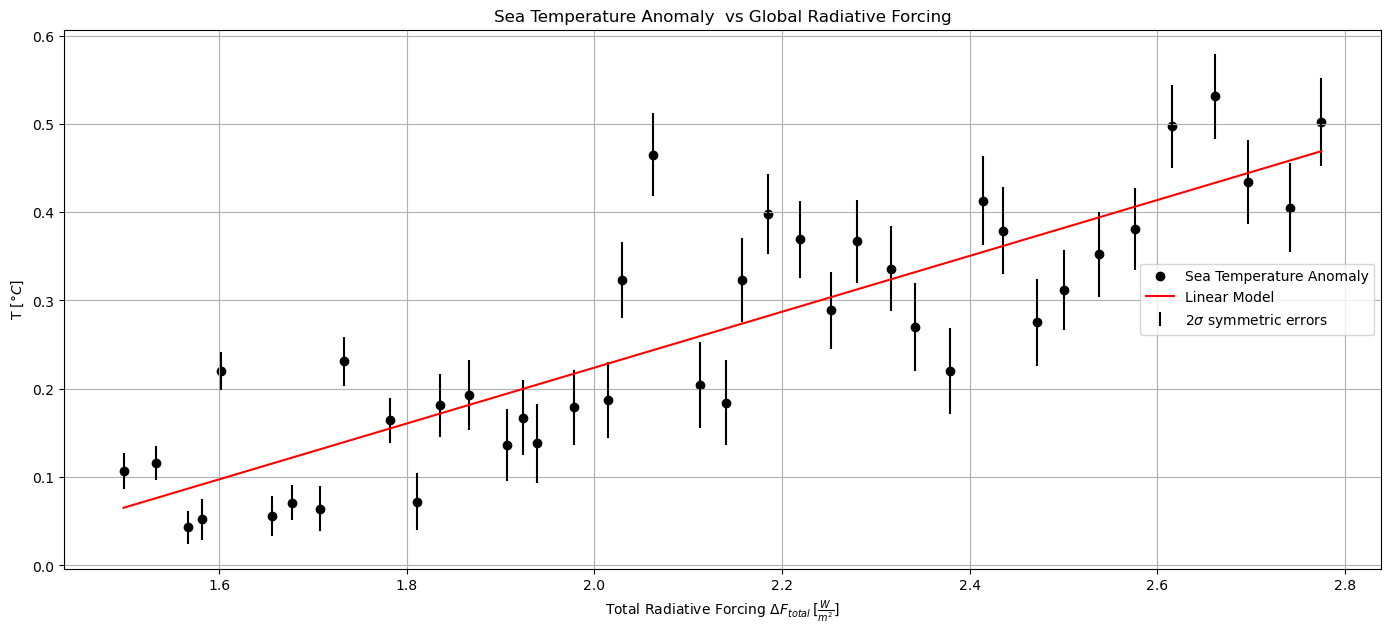

In [149]:
plt.figure(figsize=(17,7))

plt.scatter(f_total_c, sea_mean_c, color = "k", label = "Sea Temperature Anomaly")
plt.errorbar(f_total_c, sea_mean_c, yerr = sea_err_c, color = "k", linestyle = " ", marker = " ",label = "$2\\sigma$ symmetric errors")
plt.plot(f_total_c, sea_linear_fit, color = "r", label = "Linear Model")

plt.title("Sea Temperature Anomaly  vs Global Radiative Forcing")
plt.xlabel("Total Radiative Forcing$\\ \\Delta F_{total} \\, [\\frac{W}{m^2}]$")
plt.ylabel("T [$\\degree C$]")

plt.legend(loc=5)

plt.grid()

plt.show()
plt.close()


(f) Finally, you will make predictions for the future. Imagine the observed trends in greenhouse concentrations will continue in the next years. Use your regression model to predict $\Delta T_{\rm sea}$ in the years $2050$ and $2100$ via extrapolation. Report your results with uncertainties and show the expected trends in a figure. How much will the sea temperature have increased by those two years with respect to the reference SST?